In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import log as ln
from termcolor import colored
from sklearn.impute import SimpleImputer
from scipy.stats import norm

Método que grafica un diagrama de barras

In [249]:
def bar_plot(x,name):
    plt.figure(figsize=(12,5))
    ax = plt.subplot()
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data, color='gray')
    ax.set_xlabel(name,size=20)
    ax.set_ylabel('frecuencia ni',size=15)
    ax.set_title(f'Diagrama de barras {name}',size=15)
    plt.show()

Método que grafica una ojiva y el histograma

In [250]:
def hist_Ogive_plot(x,m,name):
    plt.figure(figsize=(25,15))
    ax = plt.subplot(231)
    sns.distplot(data[x], bins=m,color='gray', kde=False)
    ax.axvline(data[x].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[x].median(), c='b', linestyle = '--', label = 'Mediana')
    ax.set_title(f"Histograma de {name}",size=18)
    ax.set_ylabel('Frecuencia Absoluta ni',size=15)
    ax.set_xlabel(name,size=15)
    ax.legend()
    ax = plt.subplot(232)
    sns.kdeplot(data[x], color='gray', shade=True)
    ax.axvline(data[x].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[x].median(), c='b', linestyle = '--', label = 'Mediana')
    ax.set_title(f"Diagrama de densidad {name}",size=18)
    ax.set_ylabel('Frecuencia Absoluta fi',size=15)
    ax.set_xlabel(name,size=15)
    ax.legend()

    ax = plt.subplot(233)
    sns.distplot(data[x], bins=m, hist_kws=dict(cumulative=True), color='gray')
    ax.set_title(f"Diagrama de Ojiva de {name}",size=18)
    ax.set_ylabel('Freacuencia Relativa Acumulada Fi',size=15)
    ax.set_xlabel(name,size=12)
    

Grafica un digrama de caja

In [251]:
def box_plot(x,name):
    plt.figure(figsize=(10,5))
    ax = plt.subplot()
    ax = sns.boxplot(x=data[x], color='gray')
    ax.set_title(f'Diagrama de cajas de {name}',size=20)
    ax.set_xlabel(name,size=15)

Determina el número de intervalos que debe tener la tabla de frecuencias

In [252]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

Método que crea los intervalos que debe tener la tabla de frecuencias

In [253]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

Método que crea la marca de clase

In [254]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

Crea tabla de frecuencia para datos cuantitativos

In [255]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic      

Crea tabla de frecuencia para datos categoricos

In [256]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

Calcula el coeficiente de asimetria y de curtosis de la distribución

In [257]:
def is_asimetric_curtosis(columna):
    asimetria = columna.skew()
    curtosis = columna.kurt()
    message = ''
    message_2 = ''
    if asimetria == 0:
        message = 'Asimetrica'
    elif asimetria > 0:
        message = 'Asimetrica con cola hacia la derecha'
    else:
        message = 'Asimetrica con cola hacia la izquierda'
    
    if curtosis == 3:
        message_2 = 'Mesocúrtica'
    elif asimetria > 3:
        message_2 = 'Leptocúrtica'
    else:
        message_2 = 'Platicúrtica'
    return asimetria, curtosis, message, message_2

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)

In [258]:
print(colored(f'Cargamos los datos del conjunto de trafico minero no identificado.', attrs=['bold']))
data = pd.read_csv('./data_no_identificada.csv')
data.head()

Cargamos los datos del conjunto de trafico minero no identificado.


,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency
0,8992,18-csves/1435.csv,5,ICMP,NaN,NaN,0.0,0.000,0.000,0.000,...,NaN,NaN,1.0,1.0,1.0,40.00,286.0,286.0,mine,Unclassified
1,1735,16-csves/1386.csv,16,UDP,ICMP6,NaN,0.0,3.002,9.474,300.933,...,5353.0,34560.0,1.0,4.0,4.0,41.75,563.5,688.0,mine,Unclassified
2,32353,20-csves/4514.csv,20,ICMP6,NaN,NaN,0.0,0.000,0.000,0.000,...,34304.0,NaN,1.0,1.0,1.0,32.00,32.0,32.0,mine,Unclassified
3,2237,1147-csves/1.csv,315,TCP,UDP,NaN,0.0,0.001,45.779,9668.430,...,80.0,53890.0,1.0,2.0,6.0,32.00,96.0,248.0,not_mine,Does_not_have
4,34131,20-csves/6292.csv,17,ICMP6,NaN,NaN,0.0,0.000,0.000,0.000,...,34304.0,NaN,1.0,1.0,1.0,32.00,32.0,32.0,mine,Unclassified


# Análisis inicial

In [259]:
print(colored(f'Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna.', attrs=['bold']))
data.info()

Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39554 entries, 0 to 39553
Data columns (total 33 columns):
index              39554 non-null int64
Name               39554 non-null object
Netflows           39554 non-null int64
First_Protocol     39554 non-null object
Second_Protocol    33421 non-null object
Third_Protocol     20880 non-null object
p1_d               39554 non-null float64
p2_d               39554 non-null float64
p3_d               39554 non-null float64
duration           39554 non-null float64
max_d              39554 non-null float64
min_d              39554 non-null float64
#packets           39554 non-null int64
Avg_bps            39554 non-null int64
Avg_pps            39554 non-null int64
Avg_bpp            39554 non-null int64
#Bytes             39554 non-null int64
#sp                39554 non-null int64
#dp            

In [260]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 39554 registros y 33 columnas


### Inspección datos faltantes

In [261]:
print(colored(f'Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)', attrs=['bold']))
avaliable = data.isnull()
avaliable = avaliable.apply(pd.Series.value_counts)
avaliable.T

Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)


,False,True
index,39554.0,NaN
Name,39554.0,NaN
Netflows,39554.0,NaN
First_Protocol,39554.0,NaN
Second_Protocol,33421.0,6133.0
Third_Protocol,20880.0,18674.0
p1_d,39554.0,NaN
p2_d,39554.0,NaN
p3_d,39554.0,NaN
duration,39554.0,NaN


In [262]:
n = data.shape[0]

In [263]:
porce_second_pr = np.round(avaliable['Second_Protocol'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de la columna segundo protocolo(second protocol) con respecto \n al número total de registros es de {porce_second_pr}%.', attrs=['bold']))

El porcentaje de los datos faltantes de la columna segundo protocolo(second protocol) con respecto 
 al número total de registros es de 15.5%.


In [264]:
porce_third_pr = np.round(avaliable['Third_Protocol'][1] / n,3) * 100
print(colored(f'El porcentaje de los datos faltantes de tercer protocolo(third_Protocol) con respecto al número total de registros \n es de {porce_third_pr}%.', attrs=['bold']))

El porcentaje de los datos faltantes de tercer protocolo(third_Protocol) con respecto al número total de registros 
 es de 47.199999999999996%.


<font color="blue"><b><h3> Análisis</h3></b> </font>
   - El número de valores faltantes para la columna del segundo protocolo (Second_Protocol) afecta aproximadamente el 15.5% de los registros, una cantidad considerable, pero no elimino la columna, ya que la naturaleza del conjunto de datos y su tamaño, me indica que perdere información relevanta. Esto me lo confirma el analisis bivariado.
   
   - El número de valores faltantes para la columna del tercer protocolo (Third_Protocol) afecta aproximadamente el 47.2% de los registros, son casi la mitad de datos. por tal razon decido eliminar la columna, por que no aportara nada para mi estudio.

In [265]:
porce_sec_sp = np.round(avaliable['second_sp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 19.0%.


In [266]:
porce_third_sp = np.round(avaliable['third_sp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de third_sp con respecto al número total de registros es de {porce_third_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de third_sp con respecto al número total de registros es de 27.800000000000004%.


In [267]:
porce_sec_dp = np.round(avaliable['second_dp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_dp con respecto al número total de registros es de {porce_sec_dp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_dp con respecto al número total de registros es de 4.3%.


In [268]:
porce_third_sp = np.round(avaliable['third_dp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de third_dp con respecto al número total de registros es de {porce_third_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de third_dp con respecto al número total de registros es de 18.0%.


In [269]:
#print(colored(f'Elimino la columna Third_Protocol', attrs=['bold']))
#data = data.drop(['Third_Protocol'], axis=1)
#data.columns

In [270]:
print(colored(f'Remplazo los valores faltantes de las columnas, second_sp, second_dp, third_sp y third_dp por la mediana respectiva a cada columna.', attrs=['bold']))

Remplazo los valores faltantes de las columnas, second_sp, second_dp, third_sp y third_dp por la mediana respectiva a cada columna.


In [271]:
punter = pd.concat([data['second_sp'],data['second_dp'],data['third_sp'],data['third_dp']],axis=1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
values = imputer.fit_transform(punter)

In [272]:
punter = pd.DataFrame(values, columns = punter.columns, index = punter.index)
punter.head()

,second_sp,second_dp,third_sp,third_dp
0,5353.0,1281.0,45560.0,5353.0
1,0.0,5353.0,34879.0,34560.0
2,5353.0,34304.0,45560.0,5353.0
3,80.0,80.0,53890.0,53890.0
4,5353.0,34304.0,45560.0,5353.0


In [273]:
data = data.drop(['second_sp','second_dp','third_sp','third_dp'],axis=1)

In [274]:
data =pd.concat([data,punter],axis=1)
data.head()

,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,second_sp,second_dp,third_sp,third_dp
0,8992,18-csves/1435.csv,5,ICMP,NaN,NaN,0.0,0.000,0.000,0.000,...,1.0,40.00,286.0,286.0,mine,Unclassified,5353.0,1281.0,45560.0,5353.0
1,1735,16-csves/1386.csv,16,UDP,ICMP6,NaN,0.0,3.002,9.474,300.933,...,4.0,41.75,563.5,688.0,mine,Unclassified,0.0,5353.0,34879.0,34560.0
2,32353,20-csves/4514.csv,20,ICMP6,NaN,NaN,0.0,0.000,0.000,0.000,...,1.0,32.00,32.0,32.0,mine,Unclassified,5353.0,34304.0,45560.0,5353.0
3,2237,1147-csves/1.csv,315,TCP,UDP,NaN,0.0,0.001,45.779,9668.430,...,6.0,32.00,96.0,248.0,not_mine,Does_not_have,80.0,80.0,53890.0,53890.0
4,34131,20-csves/6292.csv,17,ICMP6,NaN,NaN,0.0,0.000,0.000,0.000,...,1.0,32.00,32.0,32.0,mine,Unclassified,5353.0,34304.0,45560.0,5353.0


### Inspección de tipo de dato incorrecto

<font color="blue"><b><h3> Análisis</h3></b> </font>
- Las variables second_sp, second_dp, third_sp y third_dp son de naturaleza discreta, pero tienen el tipo de dato continuo, por tal razon decido cambiarles su tipo de dato continuo a discreto

In [275]:
data = data.astype({'second_sp':'int64'})
data = data.astype({'second_dp':'int64'})
data = data.astype({'third_sp':'int64'})
data = data.astype({'third_dp':'int64'})

### Variables de referencia

<font color="blue"><b><h3> Análisis</h3></b> </font>
- Las variables Nombre(Name) e indices(Index) son columnas que hacen referencia al nombre y al indice que ocupa el registro en el conjunto de datos. Por tal razón decido eliminarlas. No aprotaran información relevante para mi estudio.

In [276]:
data = data.drop(['Name', 'index'], axis=1)
data.columns

Index(['Netflows', 'First_Protocol', 'Second_Protocol', 'Third_Protocol',
       'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', '#packets',
       'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp',
       'first_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type', 'Cryptocurrency', 'second_sp', 'second_dp', 'third_sp',
       'third_dp'],
      dtype='object')

### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categóricas(object) por separado, para hacer una análisis más organizado.

In [277]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas discretas

In [278]:
print(data_numeric_int)

['Netflows', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'first_dp', 'second_sp', 'second_dp', 'third_sp', 'third_dp']


Variables cuantitativas continuas

In [279]:
print(data_numeric_float)

['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']


Variables categoricas

In [280]:
print(data_object)

['First_Protocol', 'Second_Protocol', 'Third_Protocol', 'Type', 'Cryptocurrency']


### Balance del conjunto de datos
Analizare si la data esta balanceada

Text(0, 0.5, 'Cantidad de observaciones')

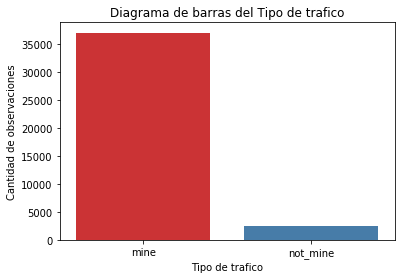

In [281]:
ax = sns.countplot(x='Type', data=data, palette="Set1")
ax.set_title("Diagrama de barras del Tipo de trafico")
ax.set_xlabel('Tipo de trafico')
ax.set_ylabel('Cantidad de observaciones')

### Valores atipicos

In [282]:
data_numerico = data_numeric_int + data_numeric_float

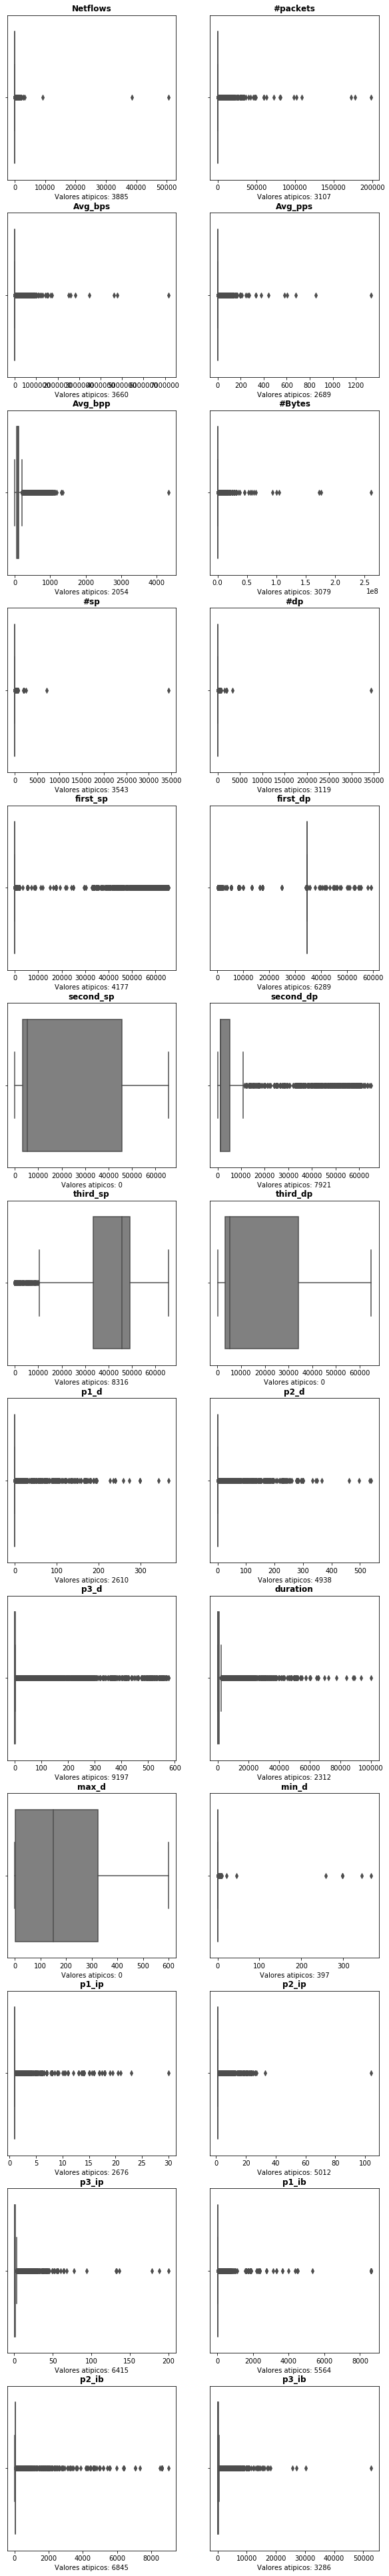

In [283]:
fig, axes = plt.subplots(nrows=13, ncols = 2, figsize=(10,70))
col = data_numerico
u = 0
for i in range(13):
    for j in range(2):
        m = col[u]
        q1 = data[m].quantile(0.25)
        q3 = data[m].quantile(0.75)
        q2 = data[m].quantile(0.5)
        ric = q3-q1
        borde_s = q3 + 1.5*ric
        borde_i = q1-1.5*ric
        atip_s = data[data[m]>borde_s].shape[0]
        atip_i = data[data[m]<borde_i].shape[0]
        sns.boxplot(x=data[col[u]], color='gray', ax = axes[i][j]) 
        axes[i][j].set_title(col[u],fontsize = 12, fontweight = "bold")
        axes[i][j].set_xlabel(f'Valores atipicos: {atip_s+atip_i}')
        u = u +1

# Inspección de datos no agrupados

### Datos categoricos 

In [284]:
print(colored(f'Variables categoricas', attrs=['bold']))
data[data_object].describe()

Variables categoricas


,First_Protocol,Second_Protocol,Third_Protocol,Type,Cryptocurrency
count,39554,33421,20880,39554,39554
unique,4,4,4,2,2
top,ICMP6,ICMP,TCP,mine,Unclassified
freq,32303,16840,12128,37053,37053


### Datos continuos

In [285]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_float].describe().T

Variables continuas


,count,mean,std,min,25%,50%,75%,max
p1_d,39554.0,1.359475,11.973356,0.0,0.000,0.0000,0.000000,366.690
p2_d,39554.0,3.214752,20.567606,0.0,0.000,0.0000,0.000000,539.310
p3_d,39554.0,11.861705,48.238255,0.0,0.000,0.0000,0.751688,576.449
duration,39554.0,911.055411,3003.219429,0.0,6.075,382.5805,933.157000,100119.108
max_d,39554.0,199.068176,203.555022,0.0,3.030,149.4070,323.916750,599.552
min_d,39554.0,0.074703,3.872895,0.0,0.000,0.0000,0.000000,366.650
p1_ip,39554.0,1.154561,0.821037,1.0,1.000,1.0000,1.000000,30.000
p2_ip,39554.0,1.354187,1.513600,1.0,1.000,1.0000,1.000000,104.000
p3_ip,39554.0,2.147039,3.811425,1.0,1.000,1.0000,2.000000,200.000
p1_ib,39554.0,50.380638,167.922853,16.0,32.000,32.0000,32.000000,8625.000


### Datos discretos

In [286]:
print(colored(f'Variables discretas', attrs=['bold']))
data[data_numeric_int].describe().T

Variables discretas


,count,mean,std,min,25%,50%,75%,max
Netflows,39554.0,39.754665,3.333068e+02,1.0,18.00,23.0,29.0,50572.0
#packets,39554.0,381.629190,2.706561e+03,1.0,23.00,52.0,94.0,198794.0
Avg_bps,39554.0,10037.042499,8.262056e+04,0.0,36.00,102.0,196.0,7161568.0
Avg_pps,39554.0,1.717804,1.407242e+01,0.0,0.00,0.0,0.0,1333.0
Avg_bpp,39554.0,112.396243,1.400845e+02,0.0,50.00,91.0,113.0,4334.0
#Bytes,39554.0,249622.384664,2.516753e+06,33.0,1322.00,4861.0,10078.5,261143006.0
#sp,39554.0,10.935658,1.804463e+02,1.0,2.00,3.0,6.0,34418.0
#dp,39554.0,11.034206,1.773002e+02,1.0,3.00,5.0,6.0,34418.0
first_sp,39554.0,1130.433635,7.496952e+03,0.0,0.00,0.0,0.0,65492.0
first_dp,39554.0,29533.544850,1.184775e+04,53.0,34560.00,34560.0,34560.0,59369.0


# Inspección de datos agrupados

In [287]:
data_object_list = data_object
tables_frequency_cualitative = []
namess = data_object
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

Tabla de frecuencia First_Protocol


,First_Protocol,ni,fi,Ni,Fi
0,ICMP,32303,0.81668,32303,0.81668
1,UDP,4870,0.12312,37173,0.9398
2,ICMP6,2072,0.05238,39245,0.99218
3,TCP,309,0.00781,39554,0.99999
5,Total,39554,,,


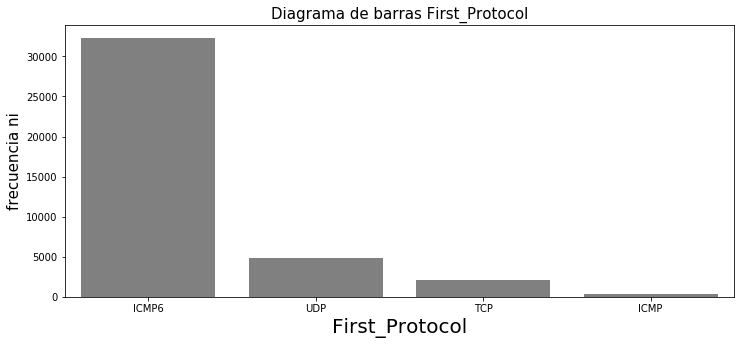

ICMP6    32303
UDP       4870
TCP       2072
ICMP       309
Name: First_Protocol, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el ICMP6 con 32303 registros.


In [288]:
print(colored(f'Tabla de frecuencia {namess[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[0])
display(table_f)
bar_plot(data_object_list[0],namess[0])
v = data[data_object_list[0]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Second_Protocol


,Second_Protocol,ni,fi,Ni,Fi
0,NaN,16840,0.42575,16840,0.42575
1,ICMP6,10352,0.26172,27192,0.68747
2,UDP,6133,0.15505,33325,0.84252
3,ICMP,3793,0.09589,37118,0.93841
4,TCP,2436,0.06159,39554,1
6,Total,39554,,,


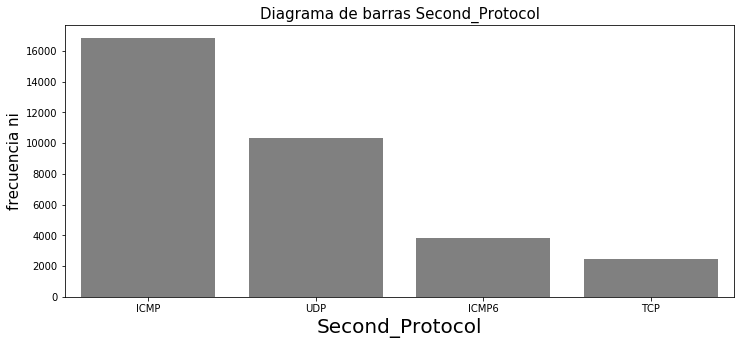

ICMP     16840
UDP      10352
ICMP6     3793
TCP       2436
Name: Second_Protocol, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el ICMP con 16840 registros.


In [289]:
print(colored(f'Tabla de frecuencia {namess[1]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[1])
display(table_f)
bar_plot(data_object_list[1],namess[1])
v = data[data_object_list[1]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Third_Protocol


,Third_Protocol,ni,fi,Ni,Fi
0,NaN,18674,0.47211,18674,0.47211
1,TCP,12128,0.30662,30802,0.77873
2,ICMP,4224,0.10679,35026,0.88552
3,UDP,4000,0.10113,39026,0.98665
4,ICMP6,528,0.01335,39554,1
6,Total,39554,,,


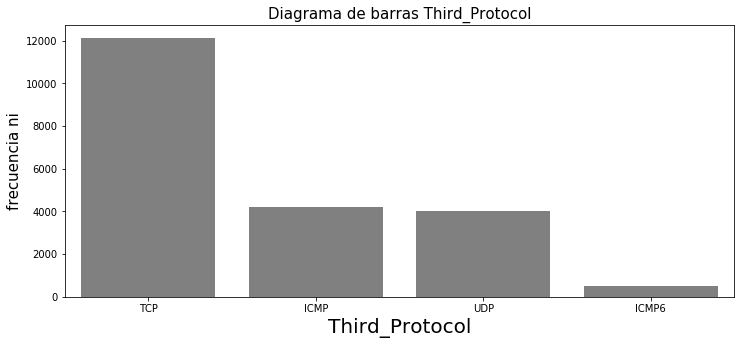

TCP      12128
ICMP      4224
UDP       4000
ICMP6      528
Name: Third_Protocol, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el TCP con 12128 registros.


In [290]:
print(colored(f'Tabla de frecuencia {namess[2]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[2])
display(table_f)
bar_plot(data_object_list[2],namess[2])
v = data[data_object_list[2]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Type


,Type,ni,fi,Ni,Fi
0,mine,37053,0.93677,37053,0.93677
1,not_mine,2501,0.06323,39554,1
3,Total,39554,,,


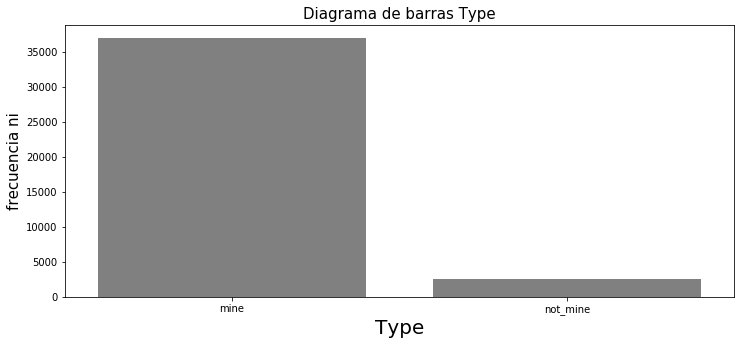

mine        37053
not_mine     2501
Name: Type, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el mine con 37053 registros.


In [291]:
print(colored(f'Tabla de frecuencia {namess[3]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[3])
display(table_f)
bar_plot(data_object_list[3],namess[3])
v = data[data_object_list[3]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Cryptocurrency


,Cryptocurrency,ni,fi,Ni,Fi
0,Unclassified,37053,0.93677,37053,0.93677
1,Does_not_have,2501,0.06323,39554,1
3,Total,39554,,,


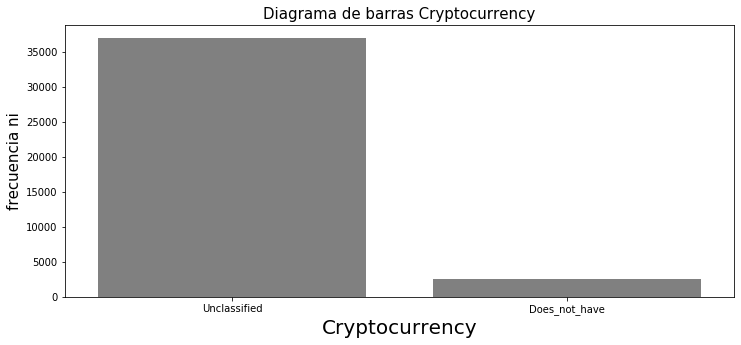

Unclassified     37053
Does_not_have     2501
Name: Cryptocurrency, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el Unclassified con 37053 registros.


In [292]:
print(colored(f'Tabla de frecuencia {namess[4]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[4])
display(table_f)
bar_plot(data_object_list[4],namess[4])
v = data[data_object_list[4]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

### Datos continuos

In [293]:
data_numeric_float_list = data_numeric_float
name_f = data_numeric_float
tables_frequency_fl = []
for j, i in enumerate(data_numeric_float_list):
    tables_frequency_fl.append(made_frequency_table_A(i, data,1, name_f[j]))

In [294]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

15

Tabla de frecuencia de p1_d


,p1_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 24.446)",39005,0.98612,39005,0.98612,12.223
1,"(24.446, 48.892)",142,0.00359003,39147,0.98971,36.669
2,"(48.892, 73.338)",144,0.00364059,39291,0.993351,61.115
3,"(73.338, 97.784)",83,0.0020984,39374,0.995449,85.561
4,"(97.784, 122.23)",76,0.00192142,39450,0.997371,110.007
5,"(122.23, 146.676)",19,0.000480356,39469,0.997851,134.453
6,"(146.676, 171.122)",45,0.00113769,39514,0.998989,158.899
7,"(171.122, 195.568)",28,0.000707893,39542,0.999697,183.345
8,"(195.568, 220.014)",0,0,39542,0.999697,207.791
9,"(220.014, 244.46)",5,0.000126409,39547,0.999823,232.237


El coeficiente de asimetria es de 12.740572409252277, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 202.5412581622487, la distribución es Leptocúrtica.


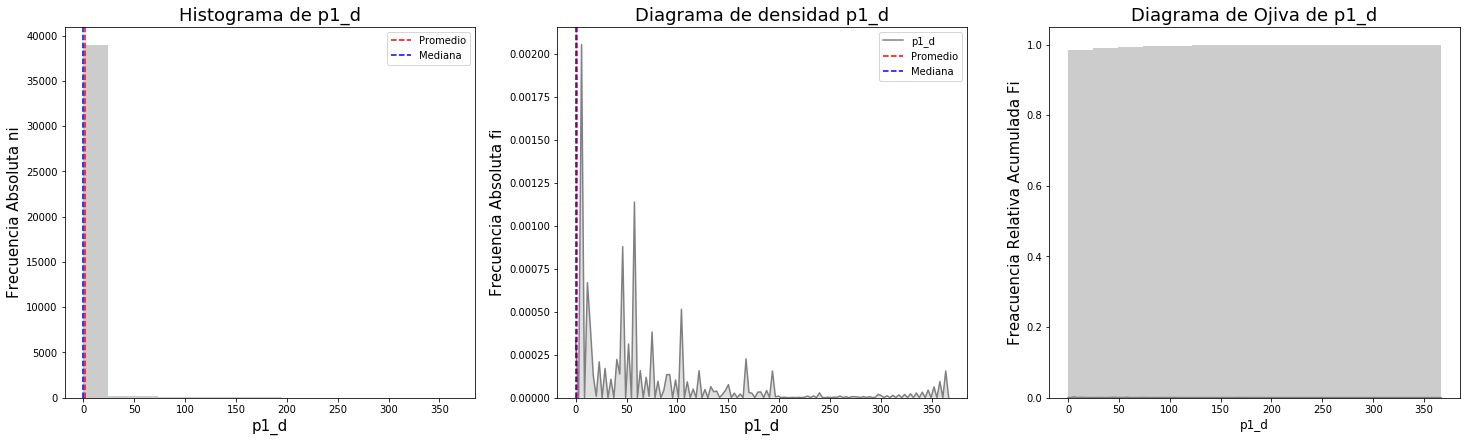

In [295]:
u = 0
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p2_d


,p2_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 35.954)",38476,0.972746,38476,0.972746,17.977
1,"(35.954, 71.908)",438,0.0110735,38914,0.98382,53.931
2,"(71.908, 107.862)",272,0.00687667,39186,0.990696,89.885
3,"(107.862, 143.816)",98,0.00247763,39284,0.993174,125.839
4,"(143.816, 179.77)",101,0.00255347,39385,0.995727,161.793
5,"(179.77, 215.724)",96,0.00242706,39481,0.998154,197.747
6,"(215.724, 251.678)",42,0.00106184,39523,0.999216,233.701
7,"(251.678, 287.632)",14,0.000353947,39537,0.99957,269.655
8,"(287.632, 323.586)",9,0.000227537,39546,0.999798,305.609
9,"(323.586, 359.54)",3,7.58457e-05,39549,0.999874,341.563


El coeficiente de asimetria es de 9.283343748230221, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 112.00354319034963, la distribución es Leptocúrtica.


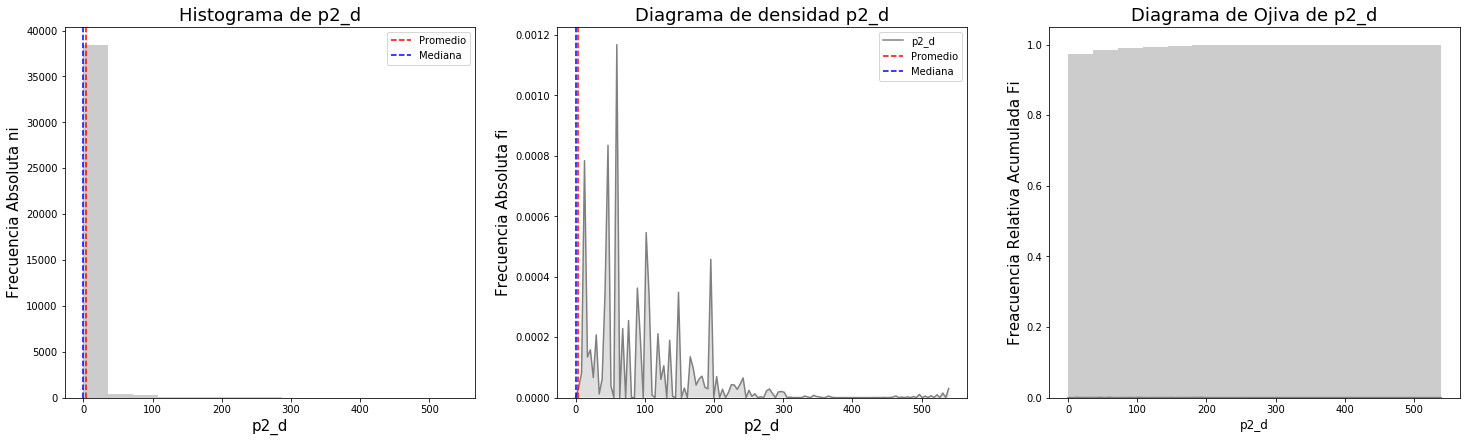

In [296]:
u = 1
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p3_d


,p3_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 38.42993)",36505,0.922916,36505,0.922916,19.215
1,"(38.42993, 76.85986)",1110,0.0280629,37615,0.950978,57.6449
2,"(76.85986, 115.28979)",609,0.0153967,38224,0.966375,96.0748
3,"(115.28979, 153.71972)",490,0.0123881,38714,0.978763,134.505
4,"(153.71972, 192.14965)",128,0.00323608,38842,0.981999,172.935
5,"(192.14965, 230.57958)",235,0.00594124,39077,0.987941,211.365
6,"(230.57958, 269.00951)",179,0.00452546,39256,0.992466,249.795
7,"(269.00951, 307.43944)",87,0.00219952,39343,0.994666,288.224
8,"(307.43944, 345.86937)",15,0.000379228,39358,0.995045,326.654
9,"(345.86937, 384.2993)",36,0.000910148,39394,0.995955,365.084


El coeficiente de asimetria es de 6.616384447366608, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 54.19451776017157, la distribución es Leptocúrtica.


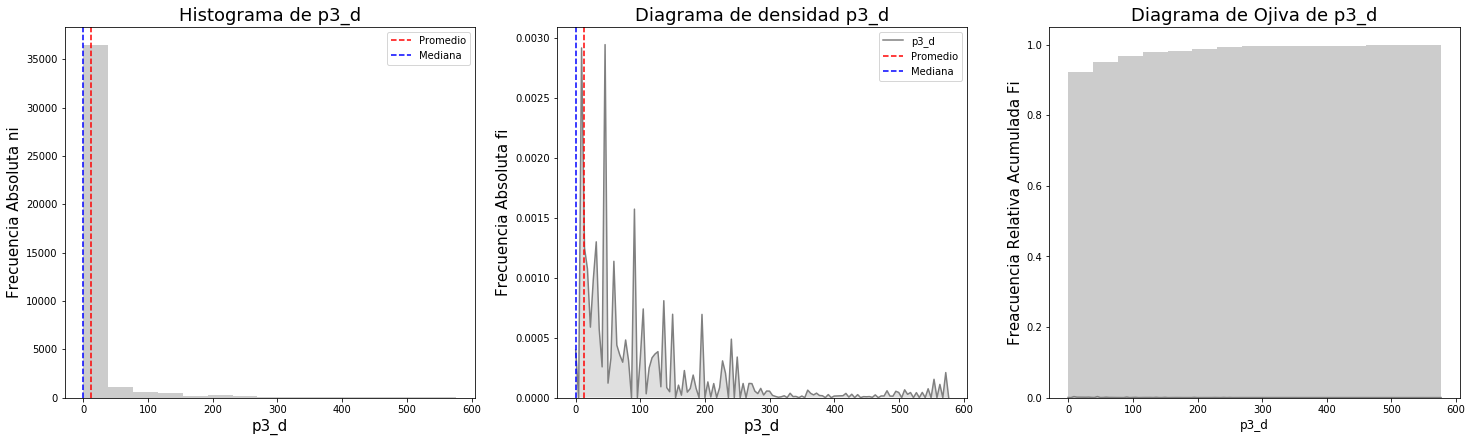

In [297]:
u = 2
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de duration


,duration,ni,fi,Ni,Fi,Xí
0,"(0.0, 6674.6072)",38798,0.980887,38798,0.980887,3337.3
1,"(6674.6072, 13349.2144)",451,0.0114021,39249,0.992289,10011.9
2,"(13349.2144, 20023.8216)",126,0.00318552,39375,0.995475,16686.5
3,"(20023.8216, 26698.4288)",63,0.00159276,39438,0.997067,23361.1
4,"(26698.4288, 33373.036)",39,0.000985994,39477,0.998053,30035.7
5,"(33373.036, 40047.6432)",25,0.000632047,39502,0.998685,36710.3
6,"(40047.6432, 46722.2504)",13,0.000328665,39515,0.999014,43384.9
7,"(46722.2504, 53396.8576)",19,0.000480356,39534,0.999494,50059.6
8,"(53396.8576, 60071.4648)",7,0.000176973,39541,0.999671,56734.2
9,"(60071.4648, 66746.072)",5,0.000126409,39546,0.999798,63408.8


El coeficiente de asimetria es de 13.151923444158536, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 248.97388249056567, la distribución es Leptocúrtica.


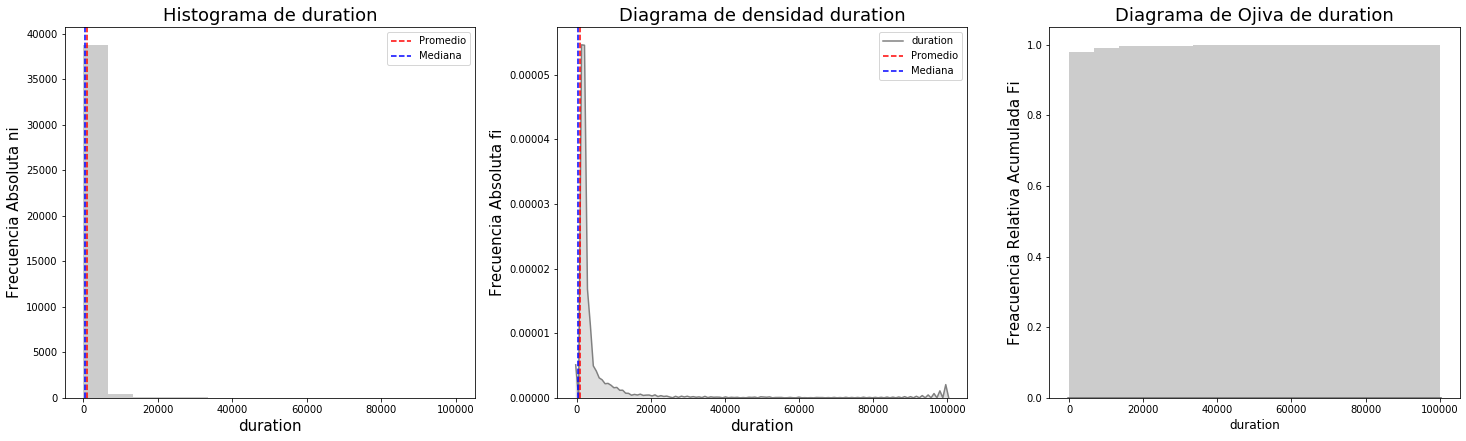

In [298]:
u = 3
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de max_d


,max_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 39.97013)",14337,0.362467,14337,0.362467,19.9851
1,"(39.97013, 79.94026)",1617,0.0408808,15954,0.403347,59.9552
2,"(79.94026, 119.91039)",1838,0.0464681,17792,0.449815,99.9253
3,"(119.91039, 159.88052)",3525,0.0891187,21317,0.538934,139.895
4,"(159.88052, 199.85065)",1994,0.0504121,23311,0.589346,179.866
5,"(199.85065, 239.82078)",1656,0.0418668,24967,0.631213,219.836
6,"(239.82078, 279.79091)",2370,0.0599181,27337,0.691131,259.806
7,"(279.79091, 319.76104)",2215,0.0559994,29552,0.747131,299.776
8,"(319.76104, 359.73117)",980,0.0247763,30532,0.771907,339.746
9,"(359.73117, 399.7013)",874,0.0220964,31406,0.794003,379.716


El coeficiente de asimetria es de 0.6937717661933134, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -0.9054624812773673, la distribución es Platicúrtica.


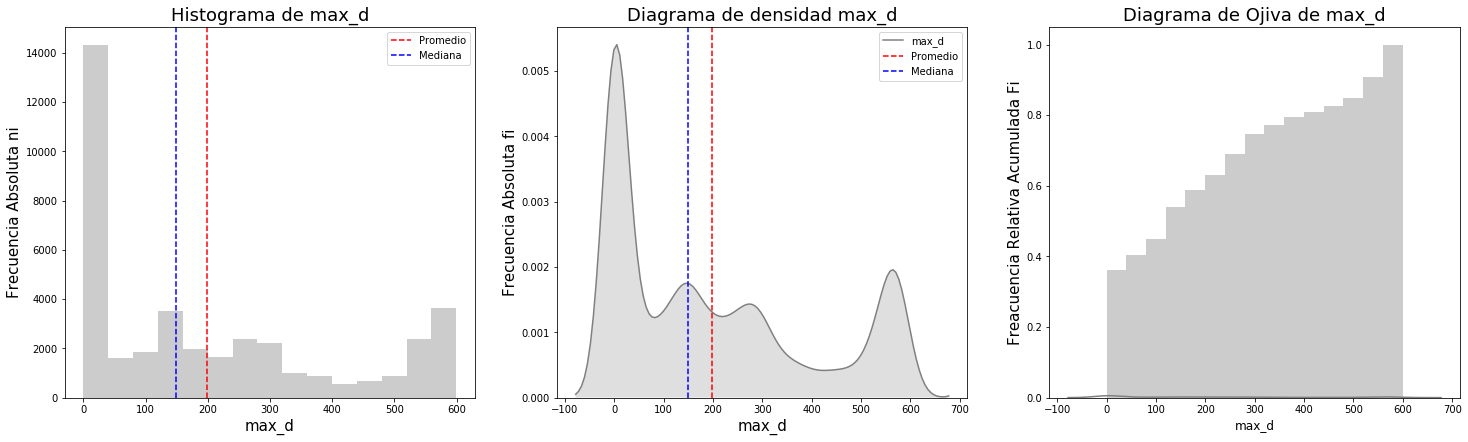

In [299]:
u = 4
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de min_d


,min_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 24.44333)",39547,0.999823,39547,0.999823,12.2217
1,"(24.44333, 48.88666)",1,2.52819e-05,39548,0.999848,36.665
2,"(48.88666, 73.32999)",0,0,39548,0.999848,61.1083
3,"(73.32999, 97.77332)",0,0,39548,0.999848,85.5516
4,"(97.77332, 122.21665)",0,0,39548,0.999848,109.995
5,"(122.21665, 146.65998)",0,0,39548,0.999848,134.438
6,"(146.65998, 171.10331)",0,0,39548,0.999848,158.882
7,"(171.10331, 195.54664)",0,0,39548,0.999848,183.325
8,"(195.54664, 219.98997)",0,0,39548,0.999848,207.768
9,"(219.98997, 244.4333)",0,0,39548,0.999848,232.212


El coeficiente de asimetria es de 81.22403793698236, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 6755.287643946549, la distribución es Leptocúrtica.


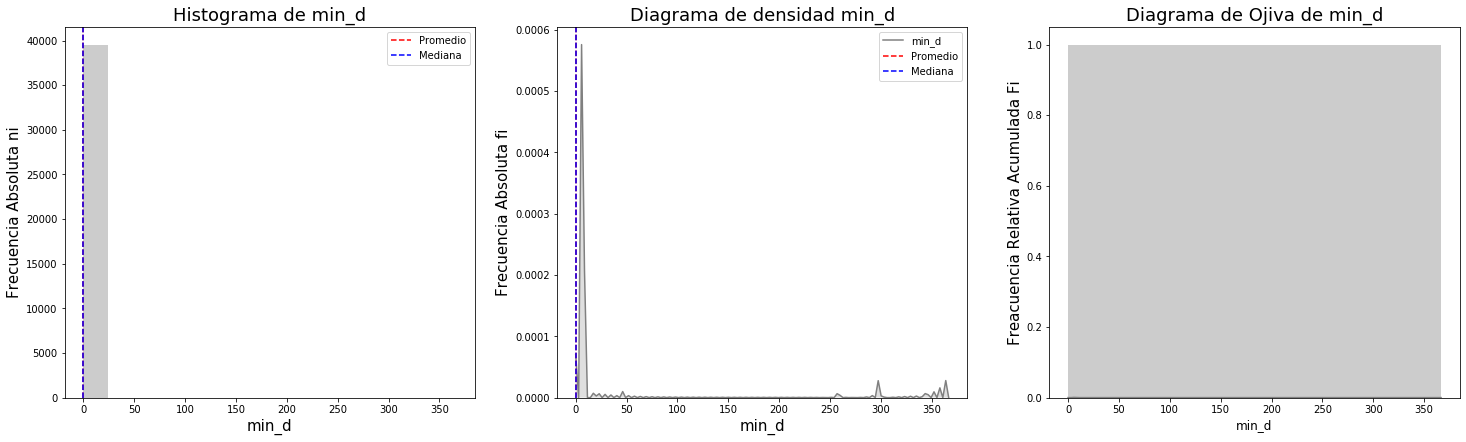

In [300]:
u = 5
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p1_ip


,p1_ip,ni,fi,Ni,Fi,Xí
0,"(1.0, 2.93333)",38080,0.962734,38080,0.962734,1.96666
1,"(2.93333, 4.86666)",1207,0.0305152,39287,0.99325,3.89999
2,"(4.86666, 6.79999)",141,0.00356475,39428,0.996814,5.83332
3,"(6.79999, 8.73332)",64,0.00161804,39492,0.998433,7.76665
4,"(8.73332, 10.66665)",10,0.000252819,39502,0.998685,9.69998
5,"(10.66665, 12.59998)",6,0.000151691,39508,0.998837,11.6333
6,"(12.59998, 14.53331)",16,0.00040451,39524,0.999242,13.5666
7,"(14.53331, 16.46664)",9,0.000227537,39533,0.999469,15.5
8,"(16.46664, 18.39997)",15,0.000379228,39548,0.999848,17.4333
9,"(18.39997, 20.3333)",2,5.05638e-05,39550,0.999899,19.3666


El coeficiente de asimetria es de 11.273557242401848, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 200.36417505458348, la distribución es Leptocúrtica.


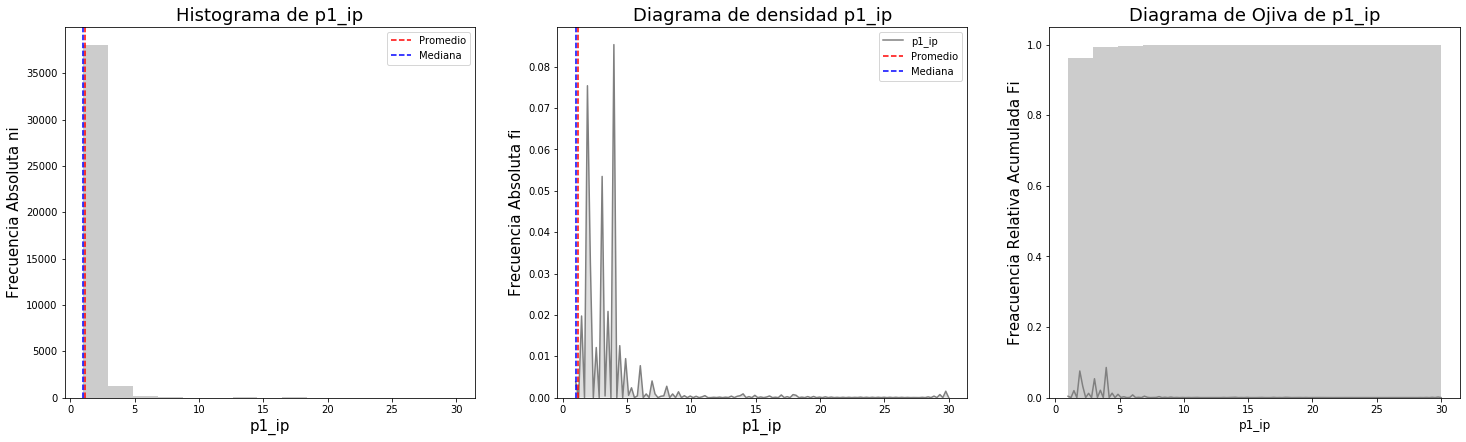

In [301]:
u = 6
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p2_ip


,p2_ip,ni,fi,Ni,Fi,Xí
0,"(1.0, 7.86667)",39263,0.992643,39263,0.992643,4.43333
1,"(7.86667, 14.73334)",165,0.00417151,39428,0.996814,11.3
2,"(14.73334, 21.60001)",97,0.00245234,39525,0.999267,18.1667
3,"(21.60001, 28.46668)",27,0.000682611,39552,0.999949,25.0333
4,"(28.46668, 35.33335)",1,2.52819e-05,39553,0.999975,31.9
5,"(35.33335, 42.20002)",0,0,39553,0.999975,38.7667
6,"(42.20002, 49.06669)",0,0,39553,0.999975,45.6334
7,"(49.06669, 55.93336)",0,0,39553,0.999975,52.5
8,"(55.93336, 62.80003)",0,0,39553,0.999975,59.3667
9,"(62.80003, 69.6667)",0,0,39553,0.999975,66.2334


El coeficiente de asimetria es de 14.977128989856745, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 613.8576334689833, la distribución es Leptocúrtica.


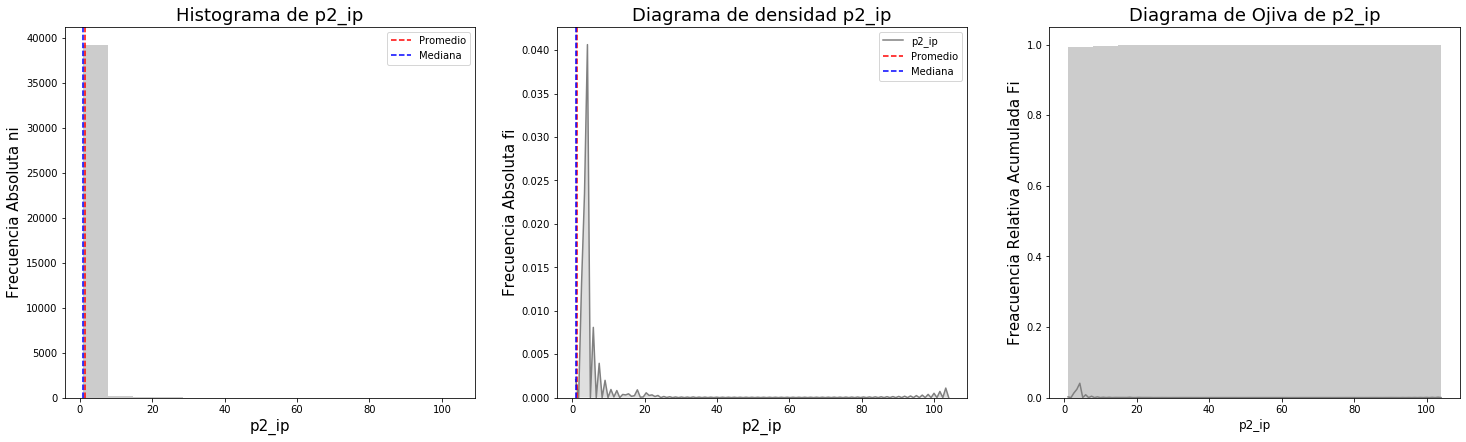

In [302]:
u = 7
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p3_ip


,p3_ip,ni,fi,Ni,Fi,Xí
0,"(1.0, 14.26667)",38971,0.985261,38971,0.985261,7.63334
1,"(14.26667, 27.53334)",484,0.0122364,39455,0.997497,20.9
2,"(27.53334, 40.80001)",59,0.00149163,39514,0.998989,34.1667
3,"(40.80001, 54.06668)",23,0.000581484,39537,0.99957,47.4333
4,"(54.06668, 67.33335)",8,0.000202255,39545,0.999772,60.7
5,"(67.33335, 80.60002)",2,5.05638e-05,39547,0.999823,73.9667
6,"(80.60002, 93.86669)",0,0,39547,0.999823,87.2334
7,"(93.86669, 107.13336)",1,2.52819e-05,39548,0.999848,100.5
8,"(107.13336, 120.40003)",0,0,39548,0.999848,113.767
9,"(120.40003, 133.6667)",2,5.05638e-05,39550,0.999899,127.033


El coeficiente de asimetria es de 16.597790964097083, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 595.1490026060978, la distribución es Leptocúrtica.


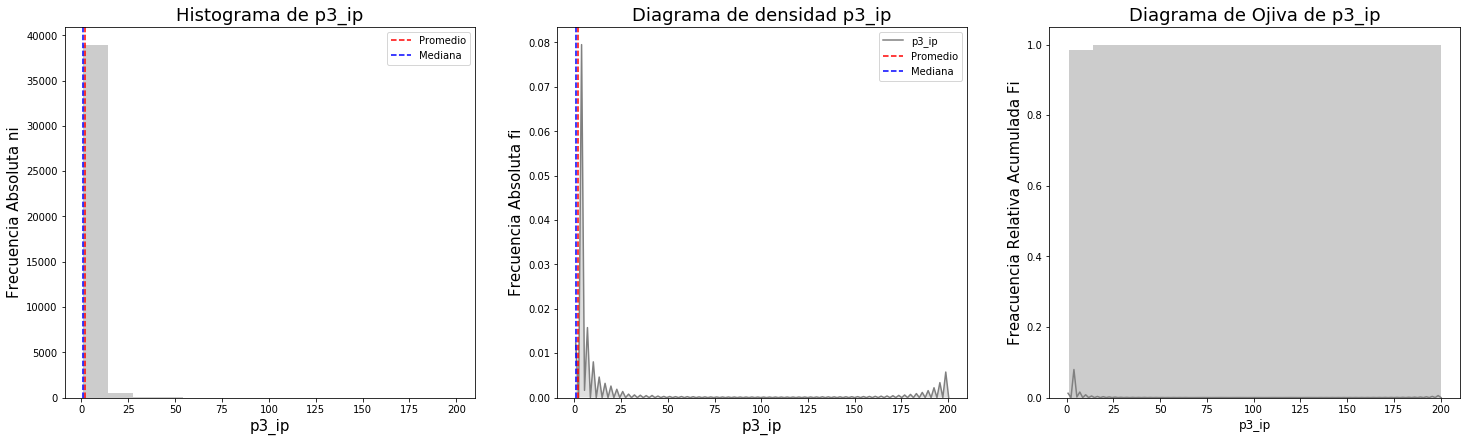

In [303]:
u = 8
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p1_ib


,p1_ib,ni,fi,Ni,Fi,Xí
0,"(16.0, 589.93333)",39419,0.996587,39419,0.996587,302.967
1,"(589.93333, 1163.86666)",89,0.00225009,39508,0.998837,876.9
2,"(1163.86666, 1737.79999)",6,0.000151691,39514,0.998989,1450.83
3,"(1737.79999, 2311.73332)",13,0.000328665,39527,0.999317,2024.77
4,"(2311.73332, 2885.66665)",8,0.000202255,39535,0.99952,2598.7
5,"(2885.66665, 3459.59998)",3,7.58457e-05,39538,0.999595,3172.63
6,"(3459.59998, 4033.53331)",3,7.58457e-05,39541,0.999671,3746.57
7,"(4033.53331, 4607.46664)",3,7.58457e-05,39544,0.999747,4320.5
8,"(4607.46664, 5181.39997)",0,0,39544,0.999747,4894.43
9,"(5181.39997, 5755.3333)",1,2.52819e-05,39545,0.999772,5468.37


El coeficiente de asimetria es de 35.49719809596909, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 1651.2760568218146, la distribución es Leptocúrtica.


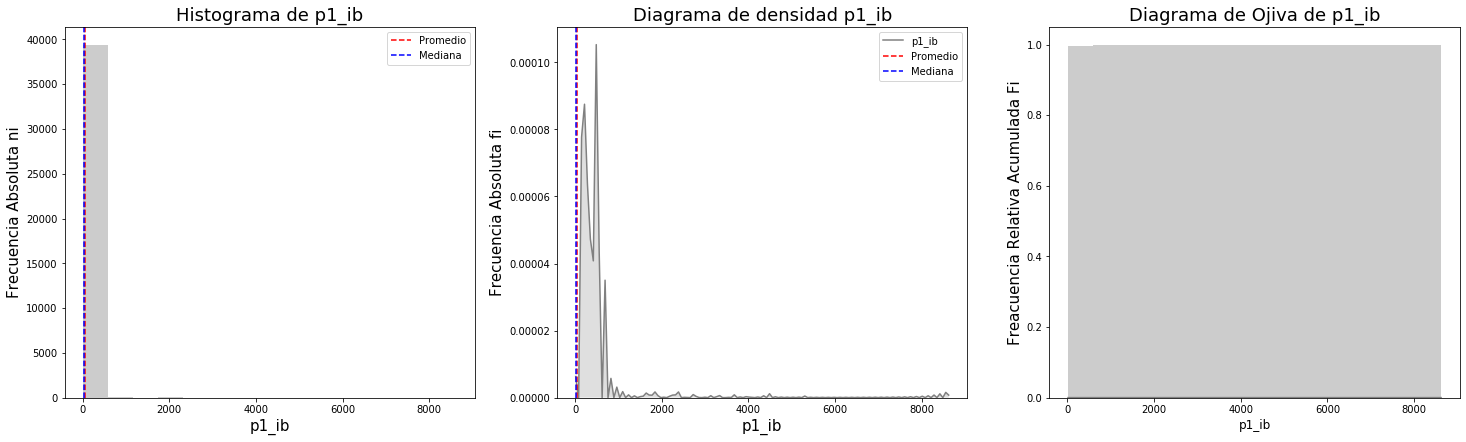

In [304]:
u = 9
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p2_ib


,p2_ib,ni,fi,Ni,Fi,Xí
0,"(20.0, 619.63333)",38906,0.983617,38906,0.983617,319.817
1,"(619.63333, 1219.26666)",483,0.0122112,39389,0.995828,919.45
2,"(1219.26666, 1818.89999)",45,0.00113769,39434,0.996966,1519.08
3,"(1818.89999, 2418.53332)",39,0.000985994,39473,0.997952,2118.72
4,"(2418.53332, 3018.16665)",19,0.000480356,39492,0.998433,2718.35
5,"(3018.16665, 3617.79998)",7,0.000176973,39499,0.998609,3317.98
6,"(3617.79998, 4217.43331)",6,0.000151691,39505,0.998761,3917.62
7,"(4217.43331, 4817.06664)",21,0.00053092,39526,0.999292,4517.25
8,"(4817.06664, 5416.69997)",5,0.000126409,39531,0.999419,5116.88
9,"(5416.69997, 6016.3333)",4,0.000101128,39535,0.99952,5716.52


El coeficiente de asimetria es de 18.38441410109603, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 459.83706305506877, la distribución es Leptocúrtica.


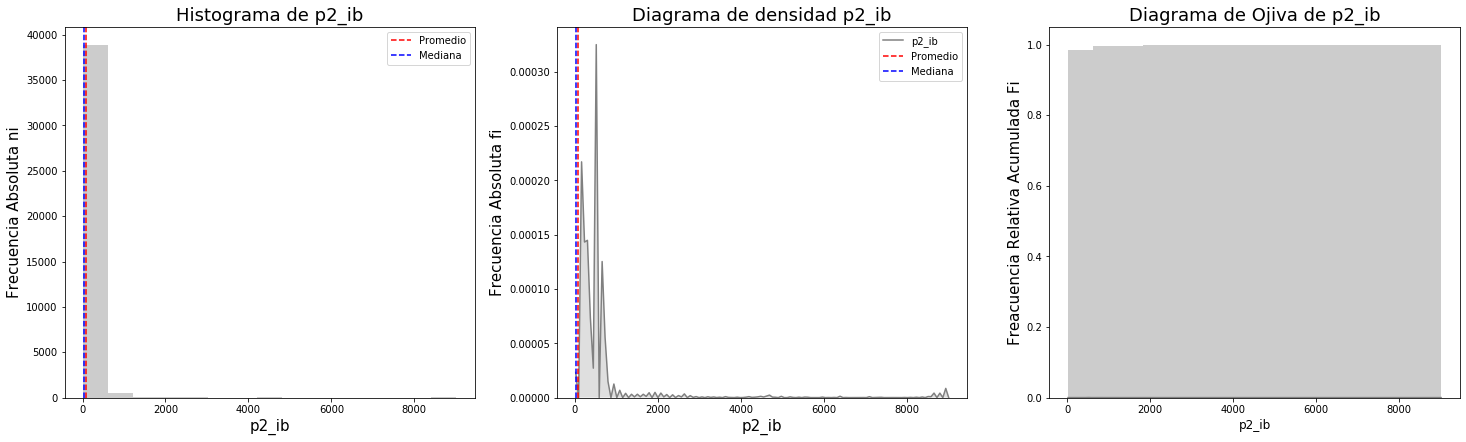

In [305]:
u = 10
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p3_ib


,p3_ib,ni,fi,Ni,Fi,Xí
0,"(20.0, 3531.3)",39235,0.991935,39235,0.991935,1775.65
1,"(3531.3, 7042.6)",223,0.00563786,39458,0.997573,5286.95
2,"(7042.6, 10553.9)",67,0.00169389,39525,0.999267,8798.25
3,"(10553.9, 14065.2)",16,0.00040451,39541,0.999671,12309.5
4,"(14065.2, 17576.5)",8,0.000202255,39549,0.999874,15820.9
5,"(17576.5, 21087.8)",1,2.52819e-05,39550,0.999899,19332.2
6,"(21087.8, 24599.1)",0,0,39550,0.999899,22843.5
7,"(24599.1, 28110.4)",2,5.05638e-05,39552,0.999949,26354.8
8,"(28110.4, 31621.7)",1,2.52819e-05,39553,0.999975,29866
9,"(31621.7, 35133.0)",0,0,39553,0.999975,33377.3


El coeficiente de asimetria es de 18.44805954600439, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 734.8080055918315, la distribución es Leptocúrtica.


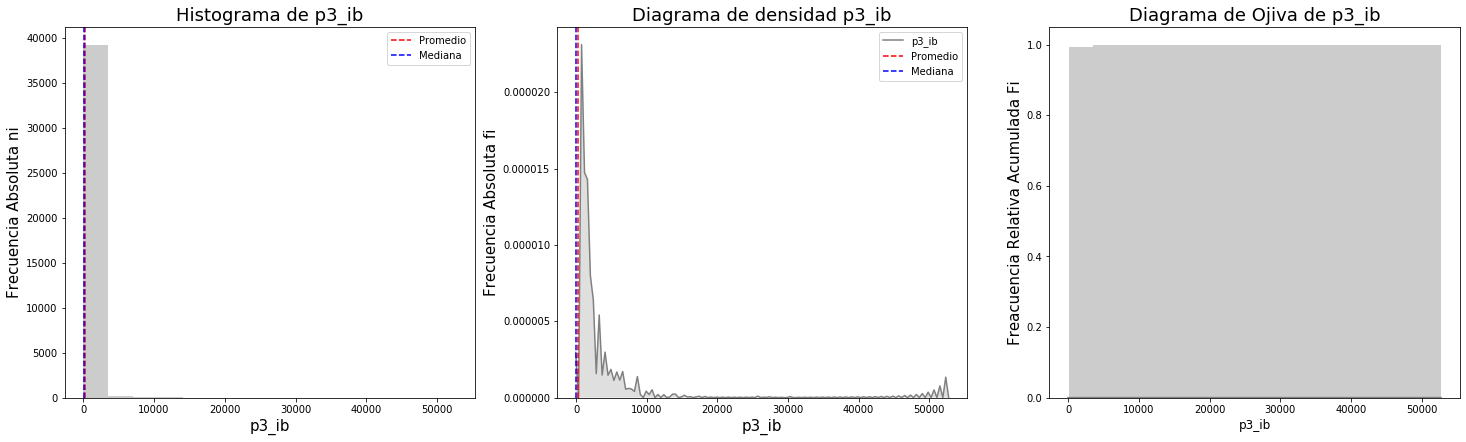

In [306]:
u = 11
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

### Datos discretos

In [307]:
data_numeric_int_list = data_numeric_int  
tables_frequency_int = []
name = data_numeric_int
for j,i in enumerate(data_numeric_int_list):
    tables_frequency_int.append(made_frequency_table_A(i, data,1,name[j]))

Tabla de frecuencia de Netflows


,Netflows,ni,fi,Ni,Fi,Xí
0,"(1, 3372.4)",39551,0.999924,39551,0.999924,1686.7
1,"(3372.4, 6743.8)",0,0,39551,0.999924,5058.1
2,"(6743.8, 10115.2)",1,2.52819e-05,39552,0.999949,8429.5
3,"(10115.2, 13486.6)",0,0,39552,0.999949,11800.9
4,"(13486.6, 16858.0)",0,0,39552,0.999949,15172.3
5,"(16858.0, 20229.4)",0,0,39552,0.999949,18543.7
6,"(20229.4, 23600.8)",0,0,39552,0.999949,21915.1
7,"(23600.8, 26972.2)",0,0,39552,0.999949,25286.5
8,"(26972.2, 30343.6)",0,0,39552,0.999949,28657.9
9,"(30343.6, 33715.0)",0,0,39552,0.999949,32029.3


El coeficiente de asimetria es de 127.88780360716214, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 17890.50337172235, la distribución es Leptocúrtica.


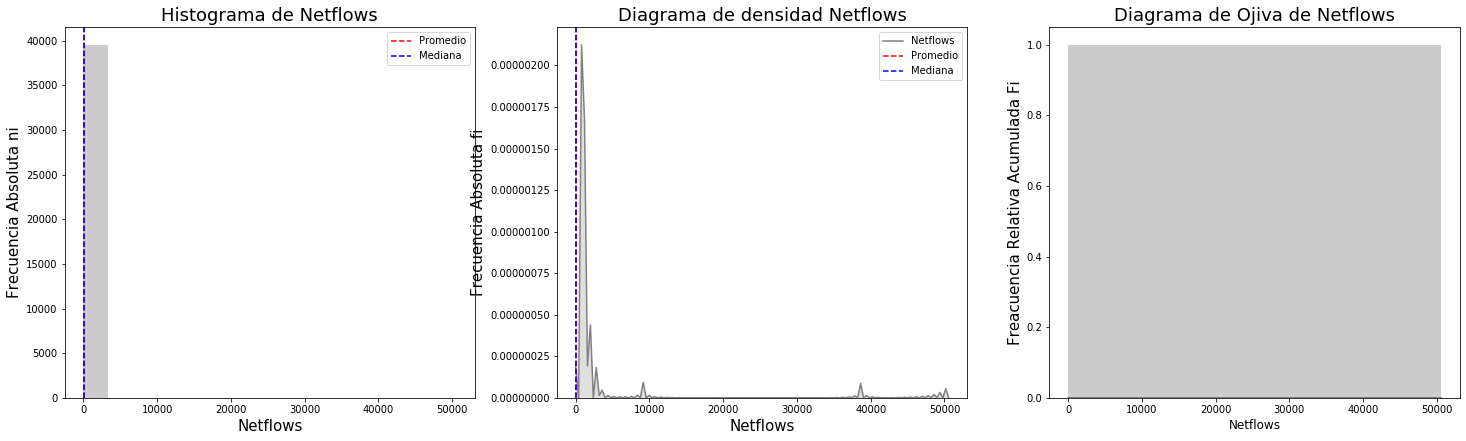

In [308]:
u = 0
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #packets


,#packets,ni,fi,Ni,Fi,Xí
0,"(1, 13253.86667)",39402,0.996157,39402,0.996157,6627.43
1,"(13253.86667, 26506.73334)",110,0.00278101,39512,0.998938,19880.3
2,"(26506.73334, 39759.60001)",22,0.000556202,39534,0.999494,33133.2
3,"(39759.60001, 53012.46668)",7,0.000176973,39541,0.999671,46386
4,"(53012.46668, 66265.33335)",4,0.000101128,39545,0.999772,59638.9
5,"(66265.33335, 79518.20002)",1,2.52819e-05,39546,0.999798,72891.8
6,"(79518.20002, 92771.06669)",2,5.05638e-05,39548,0.999848,86144.6
7,"(92771.06669, 106023.93336)",2,5.05638e-05,39550,0.999899,99397.5
8,"(106023.93336, 119276.80003)",1,2.52819e-05,39551,0.999924,112650
9,"(119276.80003, 132529.6667)",0,0,39551,0.999924,125903


El coeficiente de asimetria es de 33.79021010488348, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 1885.0811584714204, la distribución es Leptocúrtica.


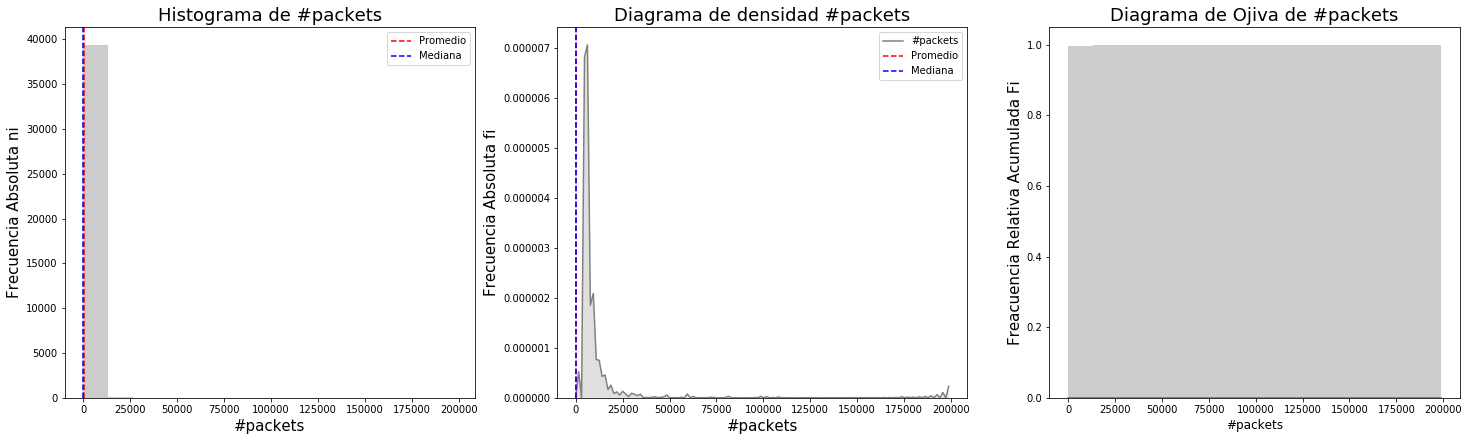

In [309]:
u = 1
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Avg_bps


,Avg_bps,ni,fi,Ni,Fi,Xí
0,"(0, 477437.86667)",39407,0.996284,39407,0.996284,238719
1,"(477437.86667, 954875.73334)",126,0.00318552,39533,0.999469,716157
2,"(954875.73334, 1432313.60001)",9,0.000227537,39542,0.999697,1.19359e+06
3,"(1432313.60001, 1909751.46668)",5,0.000126409,39547,0.999823,1.67103e+06
4,"(1909751.46668, 2387189.33335)",0,0,39547,0.999823,2.14847e+06
5,"(2387189.33335, 2864627.20002)",3,7.58457e-05,39550,0.999899,2.62591e+06
6,"(2864627.20002, 3342065.06669)",0,0,39550,0.999899,3.10335e+06
7,"(3342065.06669, 3819502.93336)",1,2.52819e-05,39551,0.999924,3.58078e+06
8,"(3819502.93336, 4296940.80003)",0,0,39551,0.999924,4.05822e+06
9,"(4296940.80003, 4774378.6667)",2,5.05638e-05,39553,0.999975,4.53566e+06


El coeficiente de asimetria es de 33.874394246567064, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 2140.7640973675548, la distribución es Leptocúrtica.


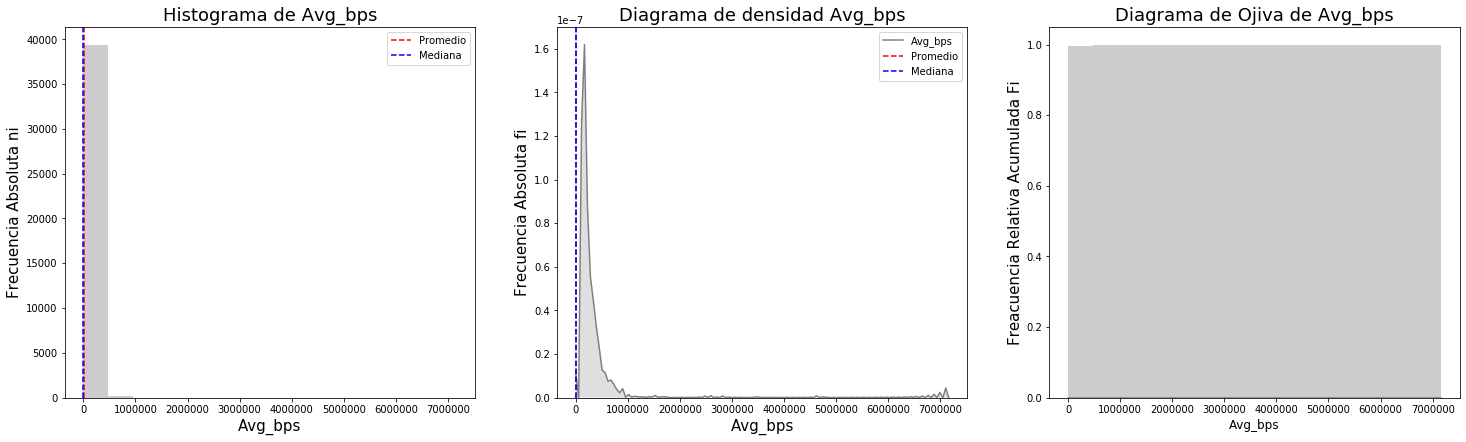

In [310]:
u = 2
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Avg_pps


,Avg_pps,ni,fi,Ni,Fi,Xí
0,"(0, 88.86667)",39442,0.997168,39442,0.997168,44.4333
1,"(88.86667, 177.73334)",95,0.00240178,39537,0.99957,133.3
2,"(177.73334, 266.60001)",7,0.000176973,39544,0.999747,222.167
3,"(266.60001, 355.46668)",3,7.58457e-05,39547,0.999823,311.033
4,"(355.46668, 444.33335)",2,5.05638e-05,39549,0.999874,399.9
5,"(444.33335, 533.20002)",0,0,39549,0.999874,488.767
6,"(533.20002, 622.06669)",2,5.05638e-05,39551,0.999924,577.633
7,"(622.06669, 710.93336)",1,2.52819e-05,39552,0.999949,666.5
8,"(710.93336, 799.80003)",0,0,39552,0.999949,755.367
9,"(799.80003, 888.6667)",1,2.52819e-05,39553,0.999975,844.233


El coeficiente de asimetria es de 38.508724210843546, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 2736.051883671566, la distribución es Leptocúrtica.


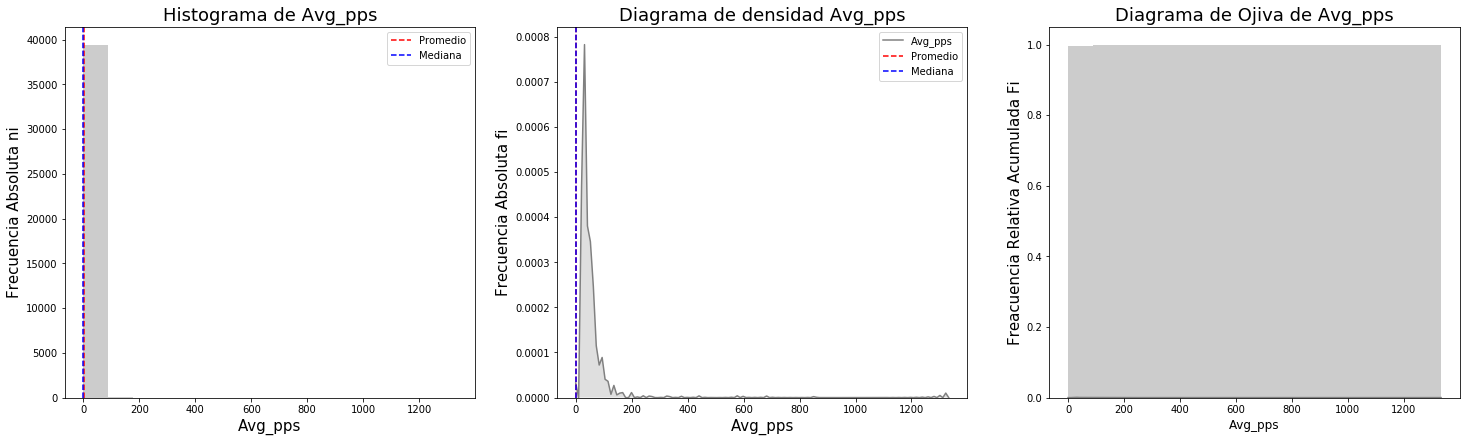

In [311]:
u = 3
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Avg_bpp


,Avg_bpp,ni,fi,Ni,Fi,Xí
0,"(0, 288.93333)",37931,0.958967,37931,0.958967,144.467
1,"(288.93333, 577.86666)",370,0.0093543,38301,0.968322,433.4
2,"(577.86666, 866.79999)",805,0.0203519,39106,0.988674,722.333
3,"(866.79999, 1155.73332)",443,0.0111999,39549,0.999874,1011.27
4,"(1155.73332, 1444.66665)",4,0.000101128,39553,0.999975,1300.2
5,"(1444.66665, 1733.59998)",0,0,39553,0.999975,1589.13
6,"(1733.59998, 2022.53331)",0,0,39553,0.999975,1878.07
7,"(2022.53331, 2311.46664)",0,0,39553,0.999975,2167
8,"(2311.46664, 2600.39997)",0,0,39553,0.999975,2455.93
9,"(2600.39997, 2889.3333)",0,0,39553,0.999975,2744.87


El coeficiente de asimetria es de 5.068074800608205, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 41.11369716189041, la distribución es Leptocúrtica.


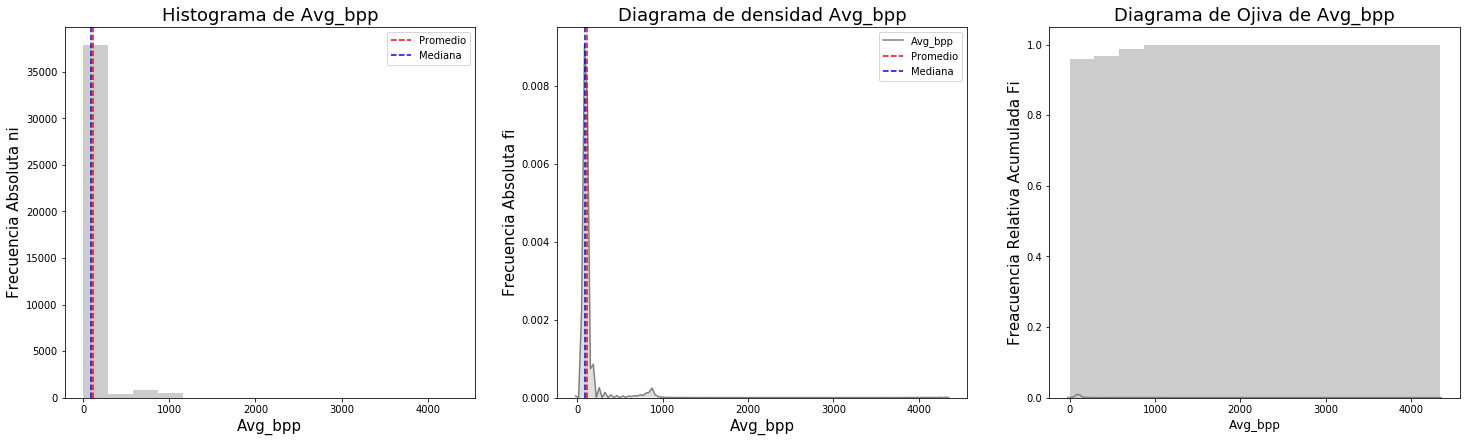

In [312]:
u = 4
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #Bytes


,#Bytes,ni,fi,Ni,Fi,Xí
0,"(33, 17409564.53333)",39507,0.998812,39507,0.998812,8.7048e+06
1,"(17409564.53333, 34819096.06666)",32,0.000809021,39539,0.999621,2.61143e+07
2,"(34819096.06666, 52228627.59999)",4,0.000101128,39543,0.999722,4.35239e+07
3,"(52228627.59999, 69638159.13332)",5,0.000126409,39548,0.999848,6.09334e+07
4,"(69638159.13332, 87047690.66665)",0,0,39548,0.999848,7.83429e+07
5,"(87047690.66665, 104457222.19998)",2,5.05638e-05,39550,0.999899,9.57525e+07
6,"(104457222.19998, 121866753.73331)",1,2.52819e-05,39551,0.999924,1.13162e+08
7,"(121866753.73331, 139276285.26664)",0,0,39551,0.999924,1.30572e+08
8,"(139276285.26664, 156685816.79997)",0,0,39551,0.999924,1.47981e+08
9,"(156685816.79997, 174095348.3333)",1,2.52819e-05,39552,0.999949,1.65391e+08


El coeficiente de asimetria es de 53.18288586934993, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 4328.9405376581335, la distribución es Leptocúrtica.


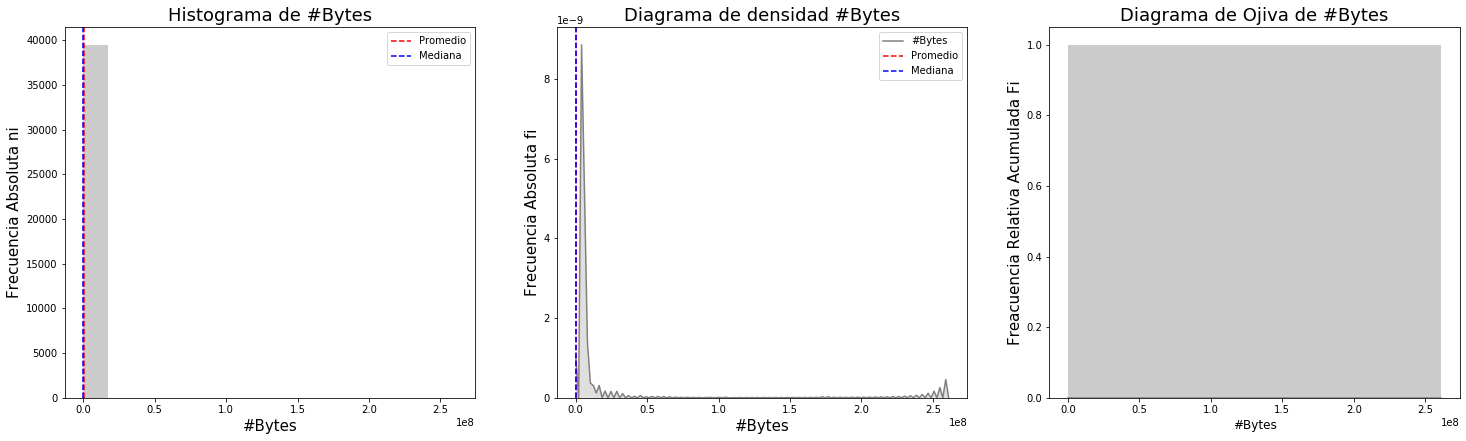

In [313]:
u = 5
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #sp


,#sp,ni,fi,Ni,Fi,Xí
0,"(1, 2295.46667)",39551,0.999924,39551,0.999924,1148.23
1,"(2295.46667, 4589.93334)",1,2.52819e-05,39552,0.999949,3442.7
2,"(4589.93334, 6884.40001)",0,0,39552,0.999949,5737.17
3,"(6884.40001, 9178.86668)",1,2.52819e-05,39553,0.999975,8031.63
4,"(9178.86668, 11473.33335)",0,0,39553,0.999975,10326.1
5,"(11473.33335, 13767.80002)",0,0,39553,0.999975,12620.6
6,"(13767.80002, 16062.26669)",0,0,39553,0.999975,14915
7,"(16062.26669, 18356.73336)",0,0,39553,0.999975,17209.5
8,"(18356.73336, 20651.20003)",0,0,39553,0.999975,19504
9,"(20651.20003, 22945.6667)",0,0,39553,0.999975,21798.4


El coeficiente de asimetria es de 177.02620024582828, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 33484.668214593425, la distribución es Leptocúrtica.


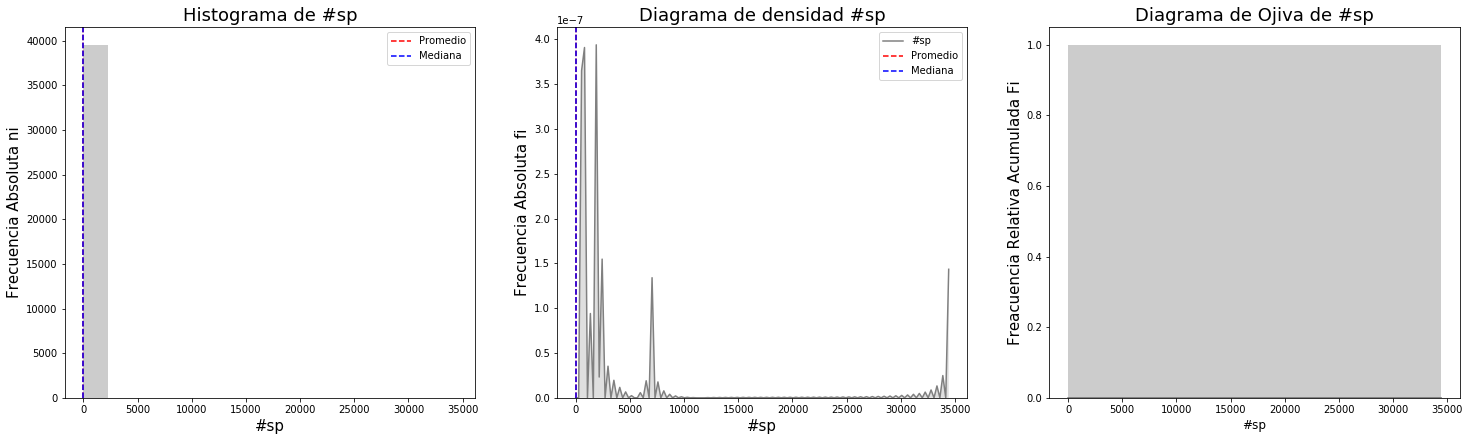

In [314]:
u = 6
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #dp


,#dp,ni,fi,Ni,Fi,Xí
0,"(1, 2295.46667)",39552,0.999949,39552,0.999949,1148.23
1,"(2295.46667, 4589.93334)",1,2.52819e-05,39553,0.999975,3442.7
2,"(4589.93334, 6884.40001)",0,0,39553,0.999975,5737.17
3,"(6884.40001, 9178.86668)",0,0,39553,0.999975,8031.63
4,"(9178.86668, 11473.33335)",0,0,39553,0.999975,10326.1
5,"(11473.33335, 13767.80002)",0,0,39553,0.999975,12620.6
6,"(13767.80002, 16062.26669)",0,0,39553,0.999975,14915
7,"(16062.26669, 18356.73336)",0,0,39553,0.999975,17209.5
8,"(18356.73336, 20651.20003)",0,0,39553,0.999975,19504
9,"(20651.20003, 22945.6667)",0,0,39553,0.999975,21798.4


El coeficiente de asimetria es de 185.13300739744852, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 35863.919755768184, la distribución es Leptocúrtica.


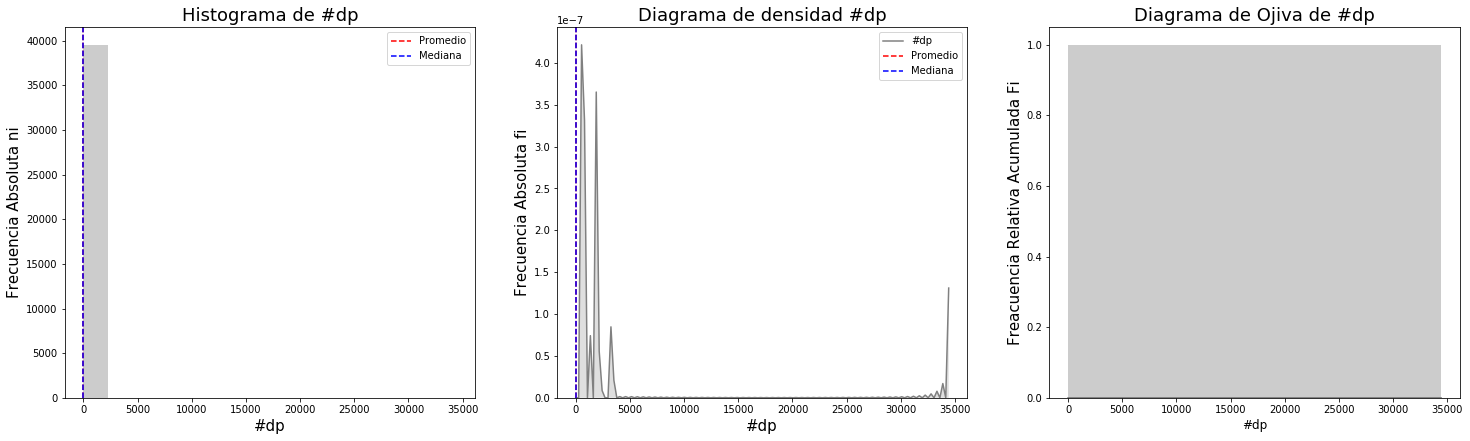

In [315]:
u = 7
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de first_sp


,first_sp,ni,fi,Ni,Fi,Xí
0,"(0, 4366.13333)",38392,0.970622,38392,0.970622,2183.07
1,"(4366.13333, 8732.26666)",348,0.0087981,38740,0.979421,6549.2
2,"(8732.26666, 13098.39999)",2,5.05638e-05,38742,0.979471,10915.3
3,"(13098.39999, 17464.53332)",3,7.58457e-05,38745,0.979547,15281.5
4,"(17464.53332, 21830.66665)",45,0.00113769,38790,0.980685,19647.6
5,"(21830.66665, 26196.79998)",6,0.000151691,38796,0.980836,24013.7
6,"(26196.79998, 30562.93331)",3,7.58457e-05,38799,0.980912,28379.9
7,"(30562.93331, 34929.06664)",20,0.000505638,38819,0.981418,32746
8,"(34929.06664, 39295.19997)",32,0.000809021,38851,0.982227,37112.1
9,"(39295.19997, 43661.3333)",46,0.00116297,38897,0.98339,41478.3


El coeficiente de asimetria es de 7.105708220427425, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 49.724260902842225, la distribución es Leptocúrtica.


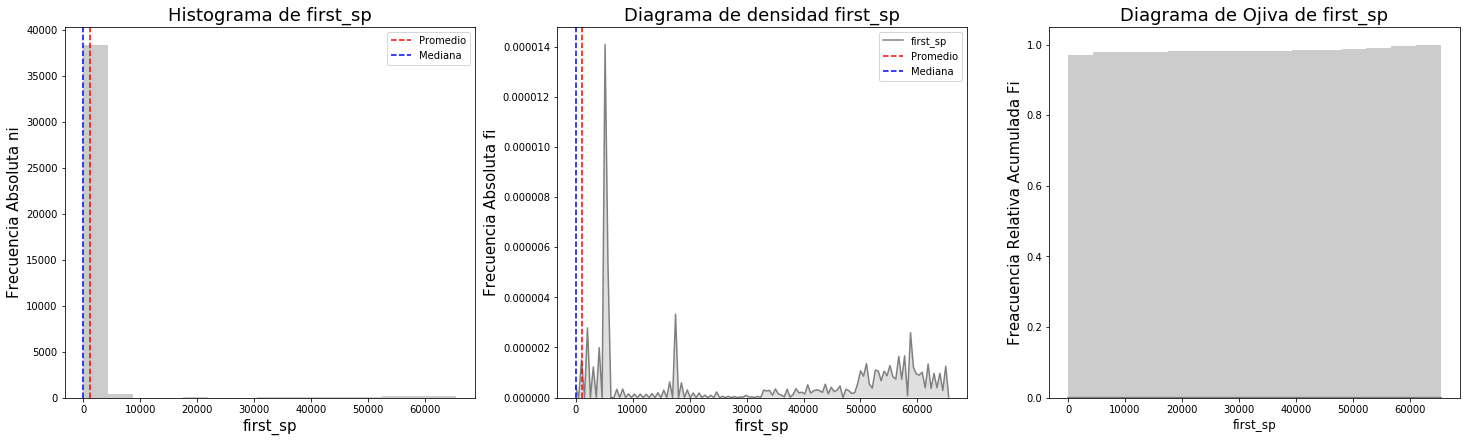

In [316]:
u = 8
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de first_dp


,first_dp,ni,fi,Ni,Fi,Xí
0,"(53, 4007.4)",4953,0.125221,4953,0.125221,2030.2
1,"(4007.4, 7961.8)",1060,0.0267988,6013,0.15202,5984.6
2,"(7961.8, 11916.2)",39,0.000985994,6052,0.153006,9939
3,"(11916.2, 15870.6)",7,0.000176973,6059,0.153183,13893.4
4,"(15870.6, 19825.0)",30,0.000758457,6089,0.153941,17847.8
5,"(19825.0, 23779.4)",0,0,6089,0.153941,21802.2
6,"(23779.4, 27733.8)",5,0.000126409,6094,0.154068,25756.6
7,"(27733.8, 31688.2)",0,0,6094,0.154068,29711
8,"(31688.2, 35642.6)",33426,0.845073,39520,0.99914,33665.4
9,"(35642.6, 39597.0)",4,0.000101128,39524,0.999242,37619.8


El coeficiente de asimetria es de -1.9300291583975164, la distribución es Asimetrica con cola hacia la izquierda.
El coeficiente de curtosis es de 1.7782689099576623, la distribución es Platicúrtica.


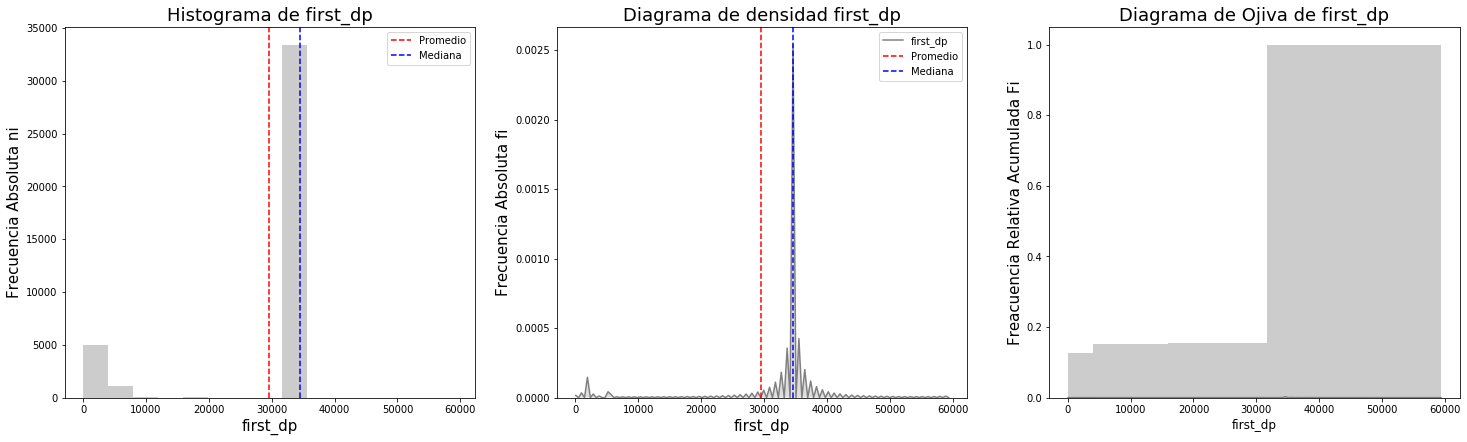

In [317]:
u = 9
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de second_sp


,second_sp,ni,fi,Ni,Fi,Xí
0,"(0, 4366.53333)",11592,0.293068,11592,0.293068,2183.27
1,"(4366.53333, 8733.06666)",13160,0.33271,24752,0.625777,6549.8
2,"(8733.06666, 13099.59999)",17,0.000429792,24769,0.626207,10916.3
3,"(13099.59999, 17466.13332)",34,0.000859584,24803,0.627067,15282.9
4,"(17466.13332, 21832.66665)",1644,0.0415634,26447,0.66863,19649.4
5,"(21832.66665, 26199.19998)",45,0.00113769,26492,0.669768,24015.9
6,"(26199.19998, 30565.73331)",22,0.000556202,26514,0.670324,28382.5
7,"(30565.73331, 34932.26664)",137,0.00346362,26651,0.673788,32749
8,"(34932.26664, 39298.79997)",280,0.00707893,26931,0.680867,37115.5
9,"(39298.79997, 43665.3333)",287,0.0072559,27218,0.688123,41482.1


El coeficiente de asimetria es de 0.7256475561268623, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -1.3103292380382099, la distribución es Platicúrtica.


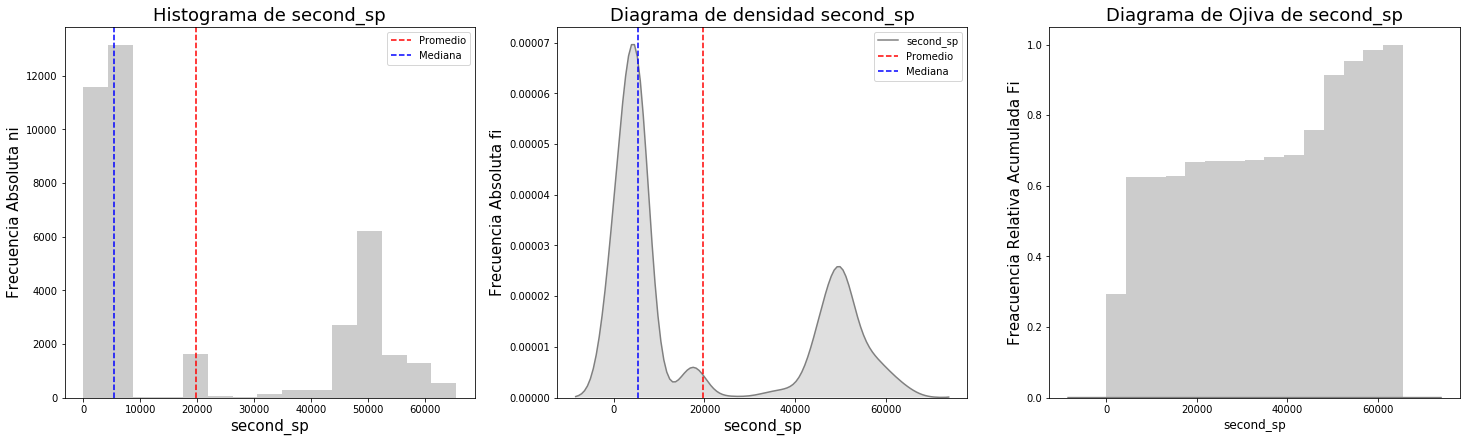

In [318]:
u = 10
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de second_dp


,second_dp,ni,fi,Ni,Fi,Xí
0,"(25, 4367.06667)",27699,0.700283,27699,0.700283,2196.03
1,"(4367.06667, 8709.13334)",3811,0.0963493,31510,0.796632,6538.1
2,"(8709.13334, 13051.20001)",128,0.00323608,31638,0.799869,10880.2
3,"(13051.20001, 17393.26668)",30,0.000758457,31668,0.800627,15222.2
4,"(17393.26668, 21735.33335)",750,0.0189614,32418,0.819588,19564.3
5,"(21735.33335, 26077.40002)",25,0.000632047,32443,0.82022,23906.4
6,"(26077.40002, 30419.46669)",18,0.000455074,32461,0.820676,28248.4
7,"(30419.46669, 34761.53336)",5363,0.135587,37824,0.956262,32590.5
8,"(34761.53336, 39103.60003)",1152,0.0291247,38976,0.985387,36932.6
9,"(39103.60003, 43445.6667)",56,0.00141579,39032,0.986803,41274.6


El coeficiente de asimetria es de 1.6611428829831563, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 1.2457275261775291, la distribución es Platicúrtica.


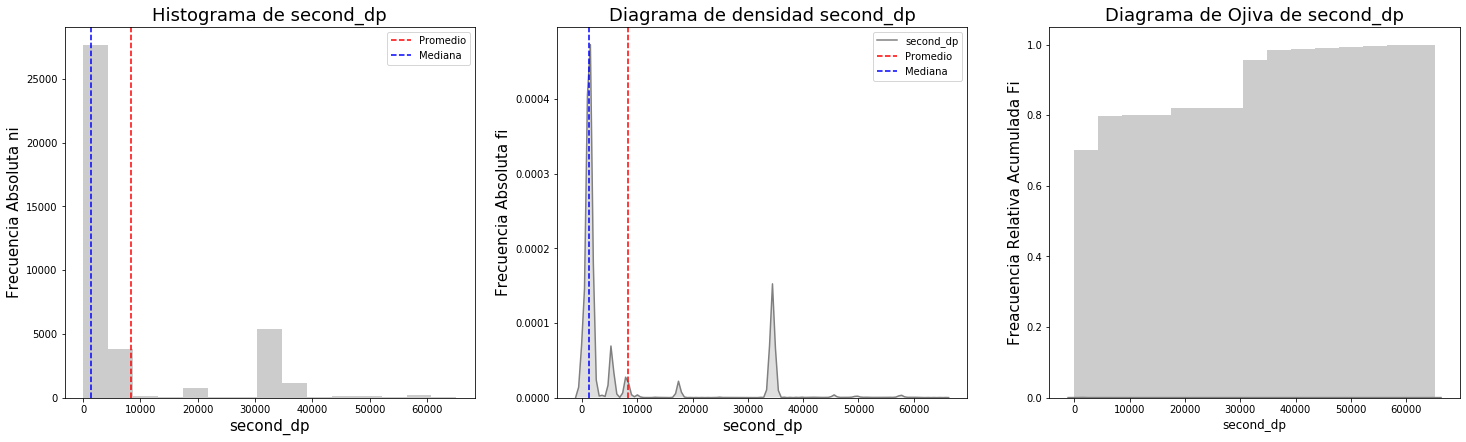

In [319]:
u = 11
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de third_sp


,third_sp,ni,fi,Ni,Fi,Xí
0,"(0, 4368.26667)",6656,0.168276,6656,0.168276,2184.13
1,"(4368.26667, 8736.53334)",1649,0.0416898,8305,0.209966,6552.4
2,"(8736.53334, 13104.80001)",23,0.000581484,8328,0.210548,10920.7
3,"(13104.80001, 17473.06668)",17,0.000429792,8345,0.210977,15288.9
4,"(17473.06668, 21841.33335)",1379,0.0348637,9724,0.245841,19657.2
5,"(21841.33335, 26209.60002)",30,0.000758457,9754,0.2466,24025.5
6,"(26209.60002, 30577.86669)",22,0.000556202,9776,0.247156,28393.7
7,"(30577.86669, 34946.13336)",221,0.0055873,9997,0.252743,32762
8,"(34946.13336, 39314.40003)",401,0.010138,10398,0.262881,37130.3
9,"(39314.40003, 43682.6667)",403,0.0101886,10801,0.27307,41498.5


El coeficiente de asimetria es de -1.0702784248572674, la distribución es Asimetrica con cola hacia la izquierda.
El coeficiente de curtosis es de -0.49810318195773684, la distribución es Platicúrtica.


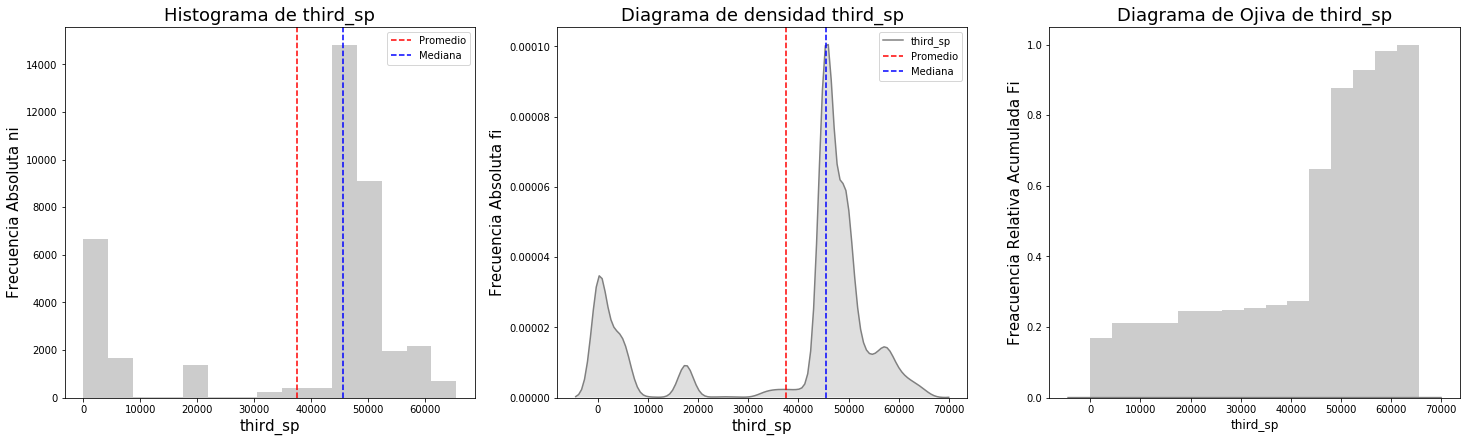

In [320]:
u = 12
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de third_dp


,third_dp,ni,fi,Ni,Fi,Xí
0,"(41, 4362.73333)",14024,0.354553,14024,0.354553,2201.87
1,"(4362.73333, 8684.46666)",11453,0.289554,25477,0.644107,6523.6
2,"(8684.46666, 13006.19999)",73,0.00184558,25550,0.645952,10845.3
3,"(13006.19999, 17327.93332)",44,0.0011124,25594,0.647065,15167.1
4,"(17327.93332, 21649.66665)",1159,0.0293017,26753,0.676366,19488.8
5,"(21649.66665, 25971.39998)",44,0.0011124,26797,0.677479,23810.5
6,"(25971.39998, 30293.13331)",29,0.000733175,26826,0.678212,28132.3
7,"(30293.13331, 34614.86664)",4647,0.117485,31473,0.795697,32454
8,"(34614.86664, 38936.59997)",1471,0.0371897,32944,0.832887,36775.7
9,"(38936.59997, 43258.3333)",83,0.0020984,33027,0.834985,41097.5


El coeficiente de asimetria es de 0.8616594777116894, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -0.9322279504552666, la distribución es Platicúrtica.


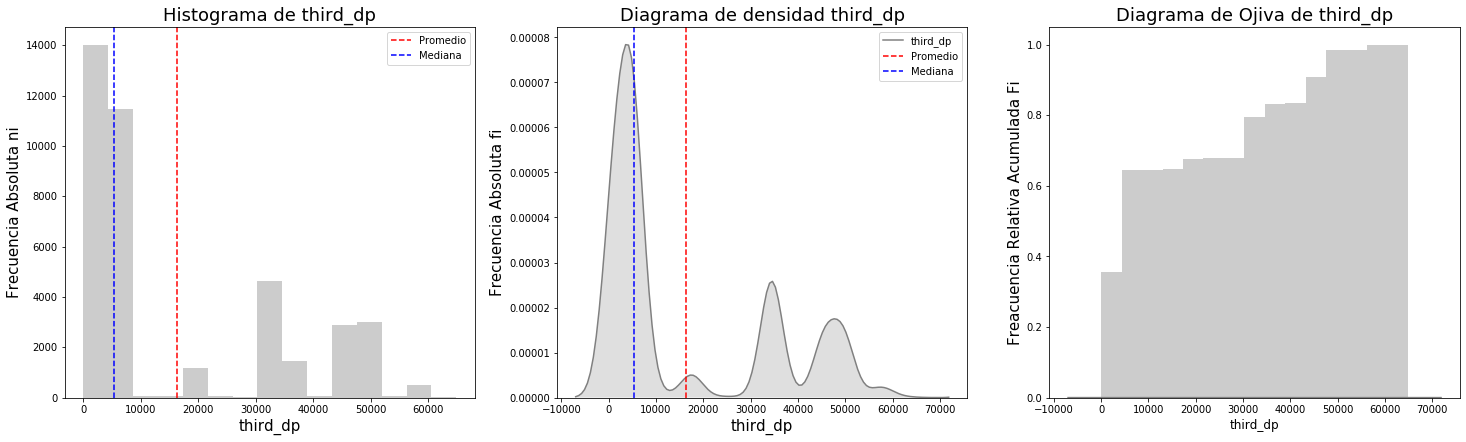

In [321]:
u = 13
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

In [ ]:
#data.to_csv('Data_No_Identificada_Tratada.csv',index = False)